In [38]:
import os
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [52]:
data = pd.read_csv("./data/climate_resilience_simulation_dataset.csv")
print(f"data length: {len(df)}")
print(f"data shape: {df.shape}")

data length: 500
data shape: (500, 10)


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 500 non-null    object 
 1   Disaster_Type        500 non-null    object 
 2   Urban_Planning_Type  500 non-null    object 
 3   Disaster_Severity    500 non-null    float64
 4   Population_Density   500 non-null    int64  
 5   Avg_Income           500 non-null    int64  
 6   Response_Time_hr     500 non-null    float64
 7   Damage_Cost_USD      500 non-null    float64
 8   Recovery_Time_days   500 non-null    int64  
 9   Resilience_Score     500 non-null    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 39.2+ KB


In [54]:
data["Urban_Planning_Type"].unique()

array(['Mixed Use', 'Dense Urban', 'Green Infrastructure',
       'Resilient Design', 'Suburban Sprawl'], dtype=object)

In [55]:
print("data basic description:")
data.describe()

data basic description:


Disaster_Severity  Population_Density     Avg_Income  Response_Time_hr  \
count         500.000000          500.000000     500.000000        500.000000   
mean            5.571620         5641.110000   75584.468000         35.912800   
std             2.591805         2583.013209   26283.709454         21.087089   
min             1.070000         1027.000000   30053.000000          1.100000   
25%             3.335000         3467.000000   52088.500000         16.467500   
50%             5.650000         5671.000000   77180.500000         35.455000   
75%             7.802500         7829.000000   99687.750000         54.047500   
max            10.000000         9991.000000  119995.000000         71.900000   

       Damage_Cost_USD  Recovery_Time_days  Resilience_Score  
count       500.000000          500.000000        500.000000  
mean     303893.191100           89.360000         74.719420  
std      215345.548197           63.665477         15.186488  
min       18066.000000            4.000000         30.420000  
25%      129081.587500           38.000000         64.935000  
50%      253875.145000           72.000000         77.865000  
75%      433775.105000          129.000000         87.012500  
max      974537.310000          281.000000         97.070000

In [56]:
# 定义变量类型
categorical_vars = ['City', 'Disaster_Type', 'Urban_Planning_Type']  # 字符串类型分类变量
numerical_vars = ['Disaster_Severity', 'Population_Density', 'Avg_Income',
                  'Response_Time_hr', 'Damage_Cost_USD']  # 数值变量
target_var = 'Recovery_Time_days'  # 目标变量（恢复时间）

# 查看分类变量的类别分布
for var in categorical_vars:
    print(f"\n{var} 类别分布：")
    print(data[var].value_counts())


City 类别分布：
City
Houston          61
San Francisco    60
Miami            55
Chicago          54
Denver           49
New York         48
Los Angeles      44
Seattle          44
Boston           43
Phoenix          42
Name: count, dtype: int64

Disaster_Type 类别分布：
Disaster_Type
Heatwave     108
Hurricane    105
Tornado      104
Wildfire      97
Flood         86
Name: count, dtype: int64

Urban_Planning_Type 类别分布：
Urban_Planning_Type
Suburban Sprawl         110
Resilient Design        105
Dense Urban              97
Mixed Use                96
Green Infrastructure     92
Name: count, dtype: int64


In [57]:
from category_encoders import TargetEncoder
# ----------------------
# 2. 分类变量编码（目标编码）
# ----------------------
# 目标编码：用目标变量的均值编码分类变量（避免独热编码维度爆炸，适合小样本）
# 注意：为避免数据泄露，使用交叉验证编码
encoder = TargetEncoder(smoothing=10)  # smoothing=10 控制平滑程度（小样本建议5-10）

# 对每个分类变量进行编码，并加入数据集
encoded_data = data.copy()
for var in categorical_vars:
    encoded_data[f'{var}_encoded'] = encoder.fit_transform(data[var], data[target_var])

# 查看编码后的结果（前5行）
print("\n编码后的分类变量示例：")
print(encoded_data[[var for var in categorical_vars] + [f'{var}_encoded' for var in categorical_vars]].head())



编码后的分类变量示例：
          City Disaster_Type   Urban_Planning_Type  City_encoded  \
0  Los Angeles         Flood             Mixed Use     92.072142   
1     New York         Flood           Dense Urban     85.780189   
2       Boston      Heatwave  Green Infrastructure     99.072725   
3  Los Angeles     Hurricane  Green Infrastructure     92.072142   
4      Seattle         Flood      Resilient Design     77.632112   

   Disaster_Type_encoded  Urban_Planning_Type_encoded  
0              86.643231                    80.056739  
1              86.643231                    97.419031  
2              97.720962                    91.845970  
3              91.028232                    91.845970  
4              86.643231                    88.609676  


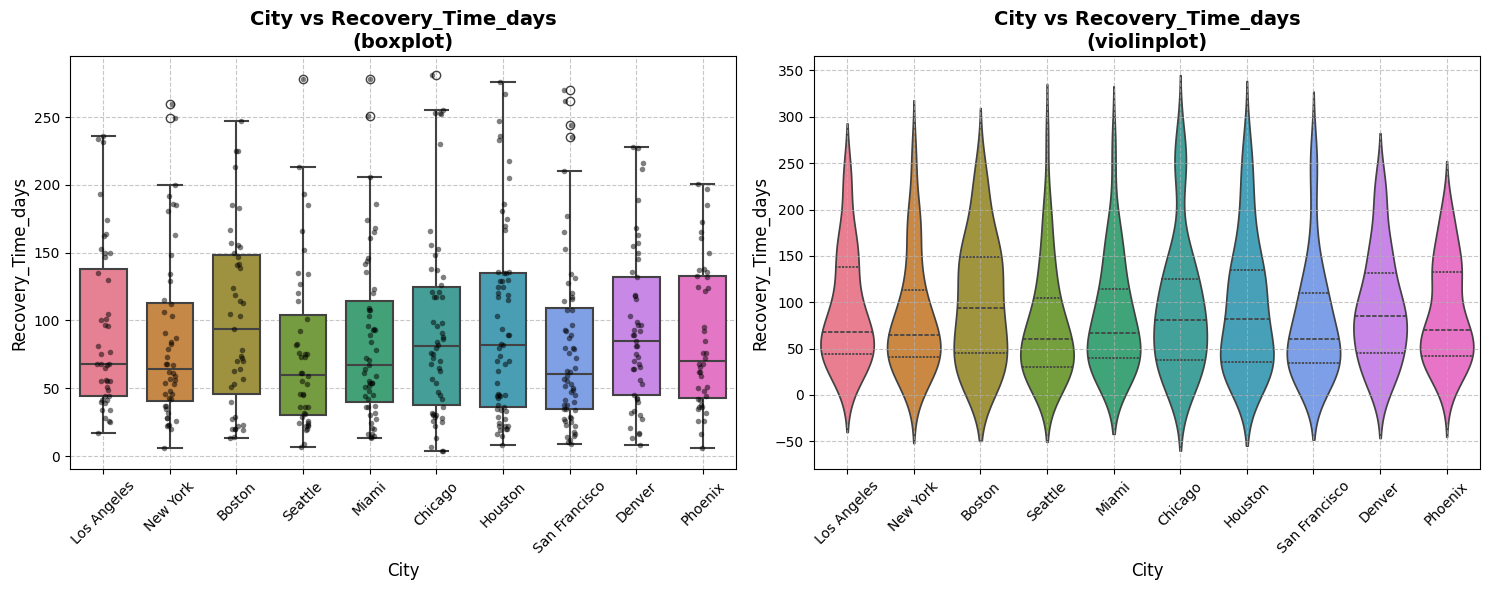

变量 'City' 与 'Recovery_Time_days' 的关联性分析结果:
ANOVA检验:
  F统计量: 0.6866
  P值: 0.7213
结论: 无显著关联 (显著性水平α=0.05)

各组描述性统计:
               count    mean    std  min  max
City                                         
Boston            43  100.05  66.22   13  247
Chicago           54   94.96  71.05    4  281
Denver            49   93.73  59.24    8  228
Houston           61   97.02  71.24    8  276
Los Angeles       44   92.32  60.60   17  236
Miami             55   85.18  61.25   13  278
New York          48   85.56  62.73    6  260
Phoenix           42   87.79  54.01    6  201
San Francisco     60   80.48  64.74    9  270
Seattle           44   76.57  61.08    7  278




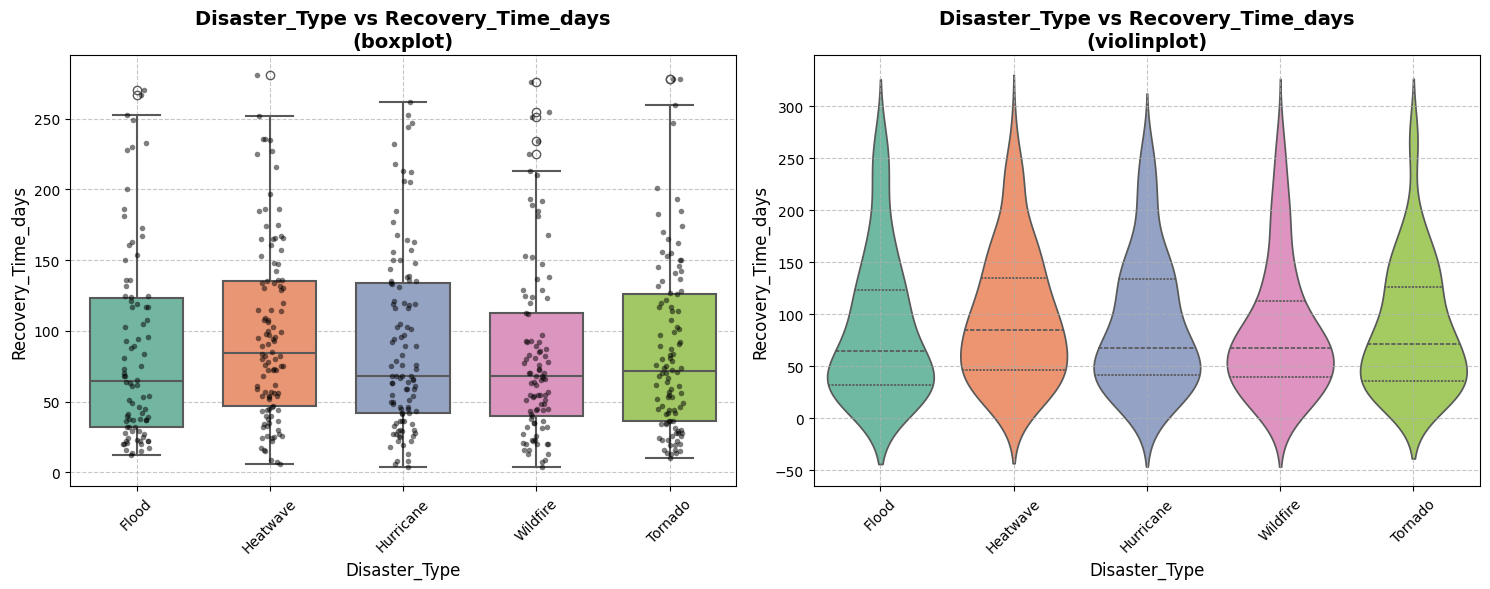

变量 'Disaster_Type' 与 'Recovery_Time_days' 的关联性分析结果:
ANOVA检验:
  F统计量: 0.7565
  P值: 0.5540
结论: 无显著关联 (显著性水平α=0.05)

各组描述性统计:
               count   mean    std  min  max
Disaster_Type                               
Flood             86  86.64  68.19   12  270
Heatwave         108  97.72  62.75    6  281
Hurricane        105  91.03  63.80    4  262
Tornado          104  86.26  61.51   10  278
Wildfire          97  83.98  62.98    4  276




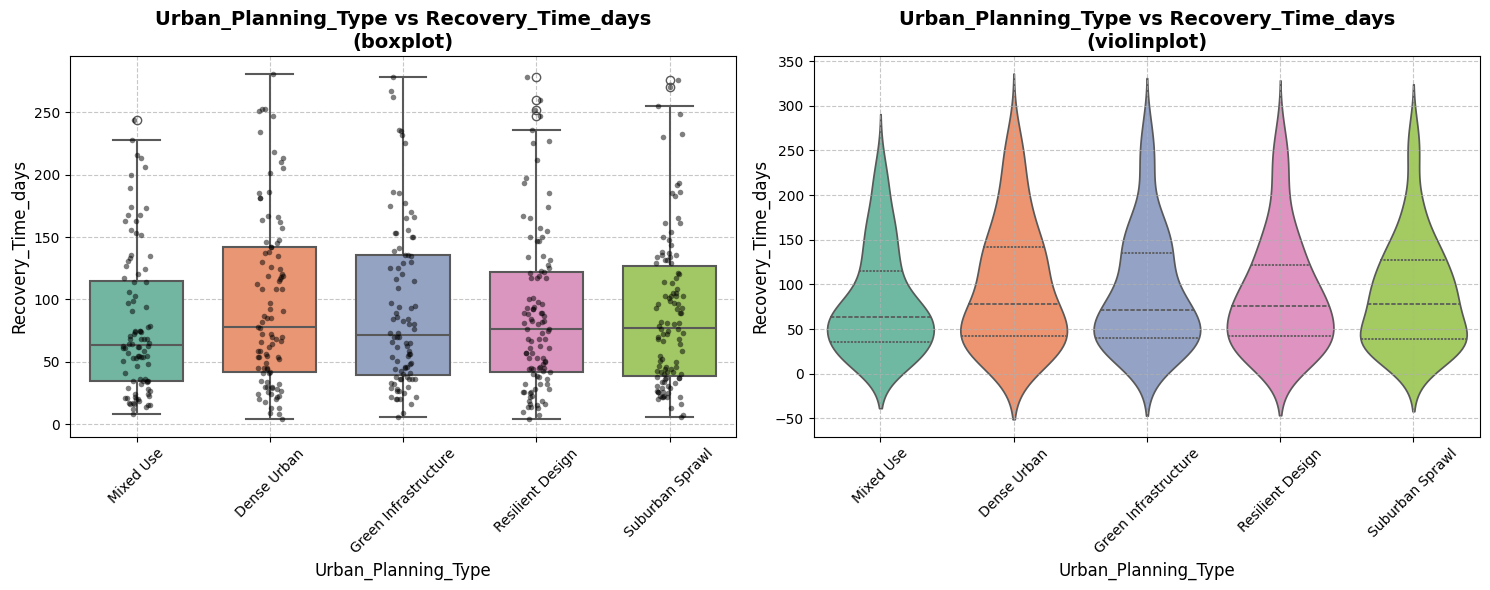

变量 'Urban_Planning_Type' 与 'Recovery_Time_days' 的关联性分析结果:
ANOVA检验:
  F统计量: 0.9411
  P值: 0.4398
结论: 无显著关联 (显著性水平α=0.05)

各组描述性统计:
                      count   mean    std  min  max
Urban_Planning_Type                                
Dense Urban              97  97.42  68.71    4  281
Green Infrastructure     92  91.85  65.55    6  278
Mixed Use                96  80.05  58.13    8  244
Resilient Design        105  88.61  64.21    4  278
Suburban Sprawl         110  89.01  61.58    6  276




In [60]:
# ----------------------
# 3. 分类变量与目标变量（Recovery_Time_days）的关联性分析
# ----------------------
def analyze_cat_target_relationship(data, cat_var, target_var):
    """分析分类变量与目标变量的关联性：多彩箱线图 + ANOVA检验"""
    # 创建图形和子图
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # 1. 多彩箱线图
    # 使用不同的调色板
    unique_cats = data[cat_var].nunique()

    # 根据类别数量选择合适的调色板
    if unique_cats <= 5:
        palette = sns.color_palette("Set2", unique_cats)
    elif unique_cats <= 8:
        palette = sns.color_palette("Set3", unique_cats)
    else:
        palette = sns.color_palette("husl", unique_cats)

    # 绘制箱线图
    sns.boxplot(x=cat_var, y=target_var, data=data, ax=ax1, palette=palette,
                width=0.7, linewidth=1.5)

    # 添加散点图显示数据分布
    sns.stripplot(x=cat_var, y=target_var, data=data, ax=ax1,
                  color="black", alpha=0.5, size=4, jitter=True)

    # 美化箱线图
    ax1.set_title(f'{cat_var} vs {target_var}\n(boxplot)', fontsize=14, fontweight='bold')
    ax1.set_xlabel(cat_var, fontsize=12)
    ax1.set_ylabel(target_var, fontsize=12)
    ax1.tick_params(axis='x', rotation=45)

    # 添加网格线
    ax1.grid(True, linestyle='--', alpha=0.7)

    # 2. 小提琴图作为补充可视化
    sns.violinplot(x=cat_var, y=target_var, data=data, ax=ax2,
                   palette=palette, inner="quartile", saturation=0.8)

    # 美化小提琴图
    ax2.set_title(f'{cat_var} vs {target_var}\n(violinplot)', fontsize=14, fontweight='bold')
    ax2.set_xlabel(cat_var, fontsize=12)
    ax2.set_ylabel(target_var, fontsize=12)
    ax2.tick_params(axis='x', rotation=45)

    # 添加网格线
    ax2.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    # ANOVA检验：判断类别间目标变量均值是否存在显著差异（原假设：均值无差异）
    groups = [data[data[cat_var] == cat][target_var] for cat in data[cat_var].unique()]
    f_val, p_val = stats.f_oneway(*groups)

    # 美化输出
    print("="*60)
    print(f"变量 '{cat_var}' 与 '{target_var}' 的关联性分析结果:")
    print("="*60)
    print(f"ANOVA检验:")
    print(f"  F统计量: {f_val:.4f}")
    print(f"  P值: {p_val:.4f}")

    # 根据P值给出更详细的结论
    if p_val < 0.001:
        significance = "极显著关联 (***)"
    elif p_val < 0.01:
        significance = "非常显著关联 (**)"
    elif p_val < 0.05:
        significance = "显著关联 (*)"
    else:
        significance = "无显著关联"

    print(f"结论: {significance} (显著性水平α=0.05)")

    # 计算并显示各组的描述性统计
    print("\n各组描述性统计:")
    group_stats = data.groupby(cat_var)[target_var].agg(['count', 'mean', 'std', 'min', 'max'])
    print(group_stats.round(2))
    print("="*60)
    print("\n")

# 对每个分类变量执行分析
for var in categorical_vars:
    analyze_cat_target_relationship(data, var, target_var)

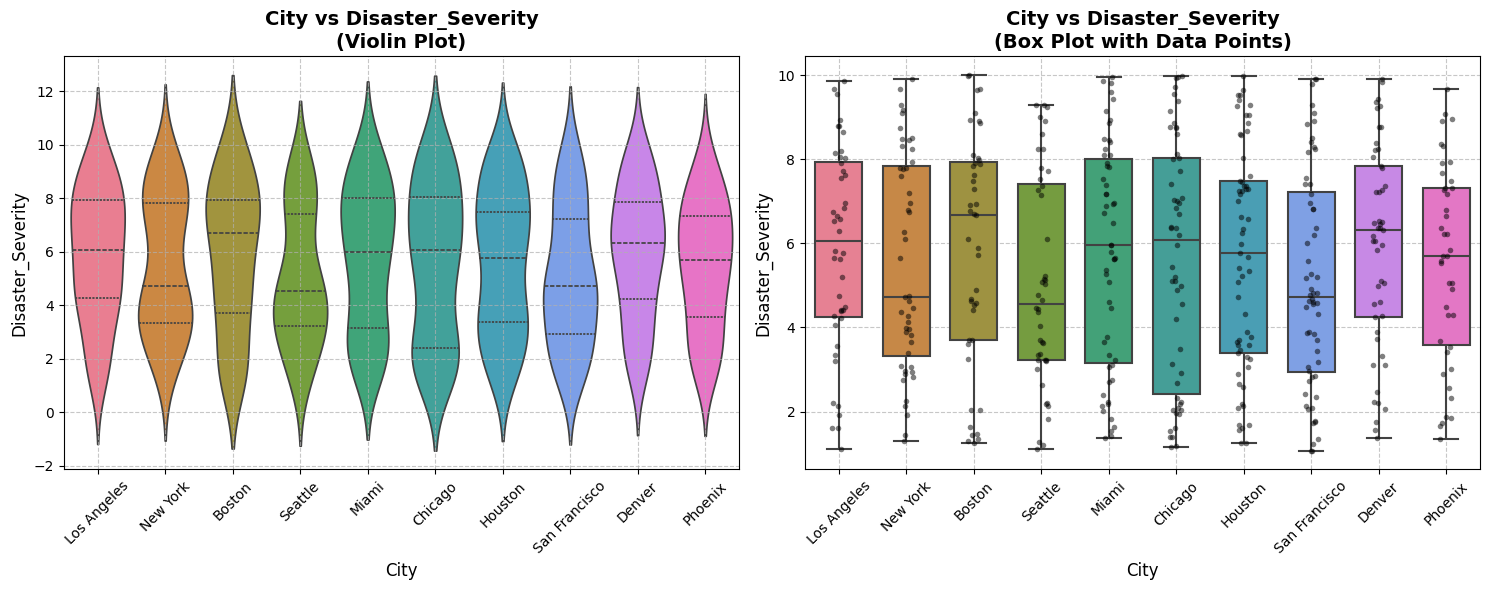

Analysis of 'City' vs 'Disaster_Severity' relationship:
ANOVA Test Results:
  F-statistic: 0.6723
  P-value: 0.7342
Conclusion: Not Significant (Significance level α=0.05)

Descriptive Statistics by Group:
               count  mean   std   min    max
City                                         
Boston            43  5.85  2.76  1.24  10.00
Chicago           54  5.56  2.88  1.16   9.98
Denver            49  5.94  2.44  1.38   9.91
Houston           61  5.63  2.66  1.26   9.98
Los Angeles       44  5.86  2.44  1.10   9.85
Miami             55  5.74  2.68  1.38   9.96
New York          48  5.54  2.55  1.29   9.90
Phoenix           42  5.52  2.36  1.35   9.66
San Francisco     60  5.10  2.58  1.07   9.90
Seattle           44  5.05  2.51  1.10   9.28




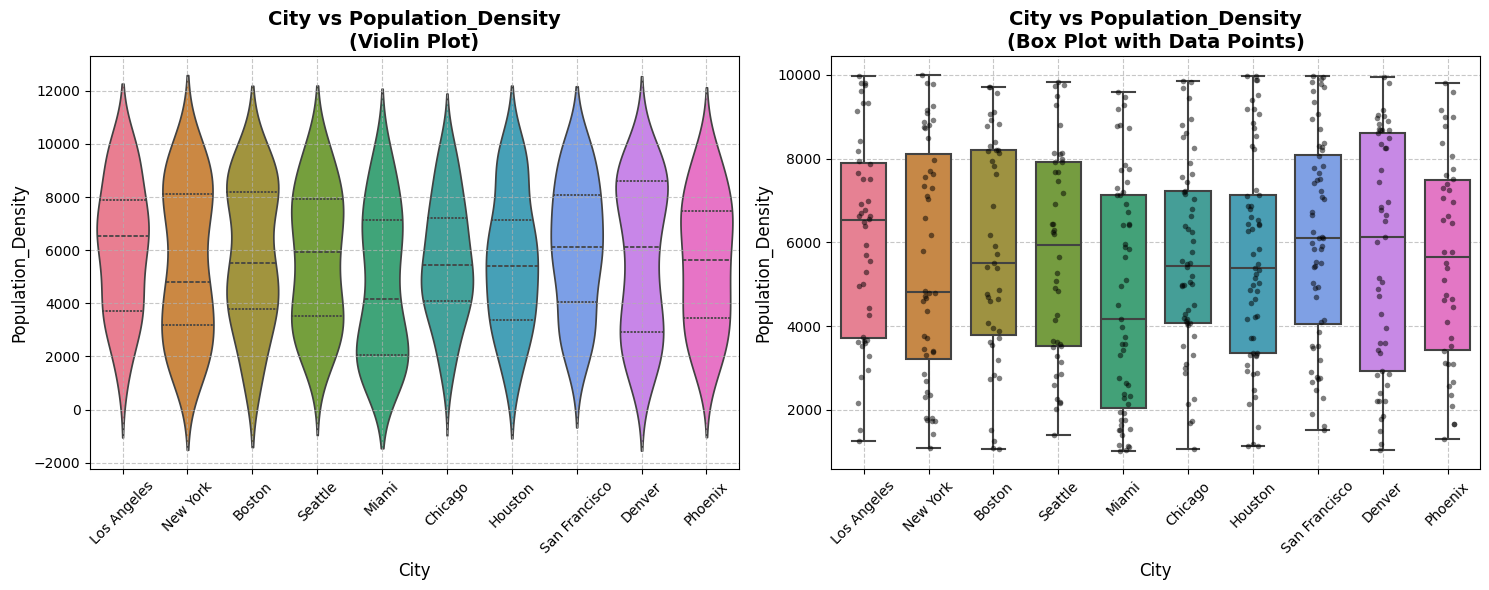

Analysis of 'City' vs 'Population_Density' relationship:
ANOVA Test Results:
  F-statistic: 1.2534
  P-value: 0.2601
Conclusion: Not Significant (Significance level α=0.05)

Descriptive Statistics by Group:
               count     mean      std   min   max
City                                              
Boston            43  5819.33  2632.29  1071  9706
Chicago           54  5622.52  2262.25  1067  9856
Denver            49  5737.12  2822.01  1049  9955
Houston           61  5625.46  2522.81  1136  9977
Los Angeles       44  6109.02  2454.12  1256  9966
Miami             55  4683.09  2764.96  1027  9595
New York          48  5534.21  2817.30  1086  9991
Phoenix           42  5585.02  2462.15  1298  9796
San Francisco     60  6091.53  2478.99  1519  9981
Seattle           44  5690.09  2515.12  1404  9837




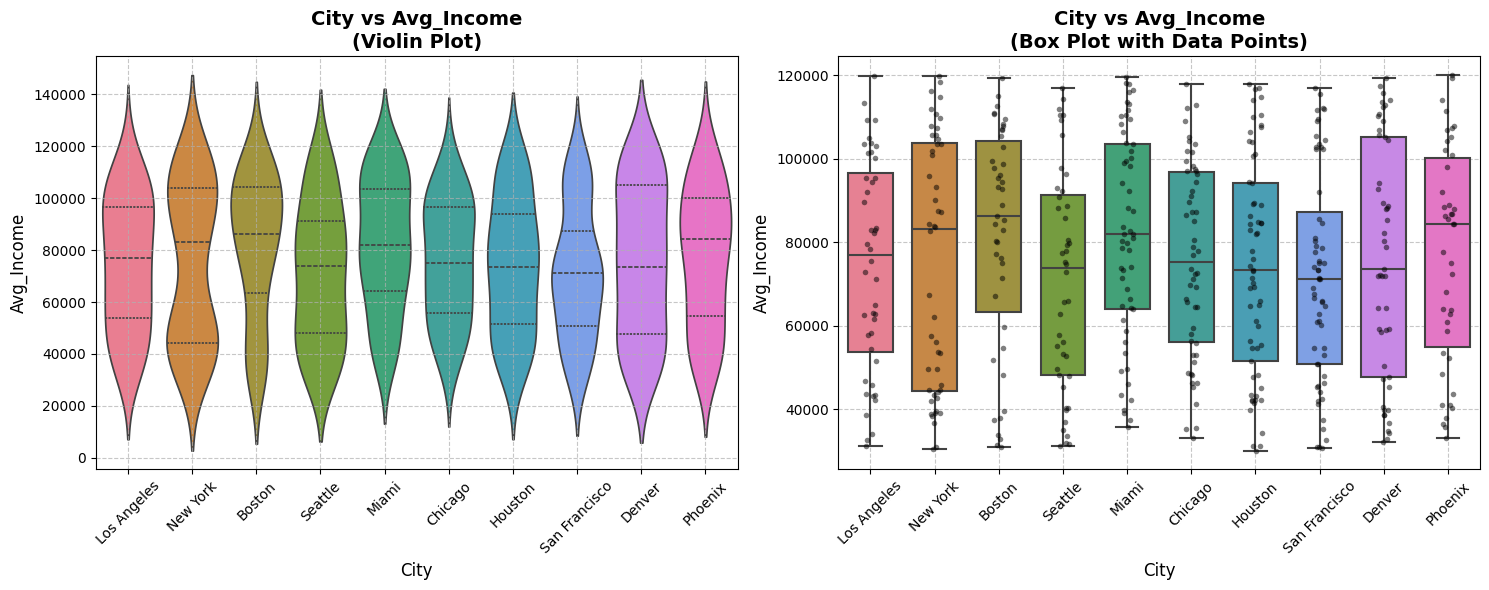

Analysis of 'City' vs 'Avg_Income' relationship:
ANOVA Test Results:
  F-statistic: 0.9549
  P-value: 0.4769
Conclusion: Not Significant (Significance level α=0.05)

Descriptive Statistics by Group:
               count      mean       std    min     max
City                                                   
Boston            43  81296.26  26955.53  30866  119353
Chicago           54  75654.80  23195.97  32960  117819
Denver            49  75708.76  28580.11  32128  119277
Houston           61  73890.66  25985.47  30053  117773
Los Angeles       44  74620.02  25462.34  31075  119687
Miami             55  81792.89  25117.53  35720  119538
New York          48  74573.15  29990.25  30464  119701
Phoenix           42  76996.19  26266.76  33037  119995
San Francisco     60  71491.00  25124.34  30716  116951
Seattle           44  70667.64  26535.99  31220  116827




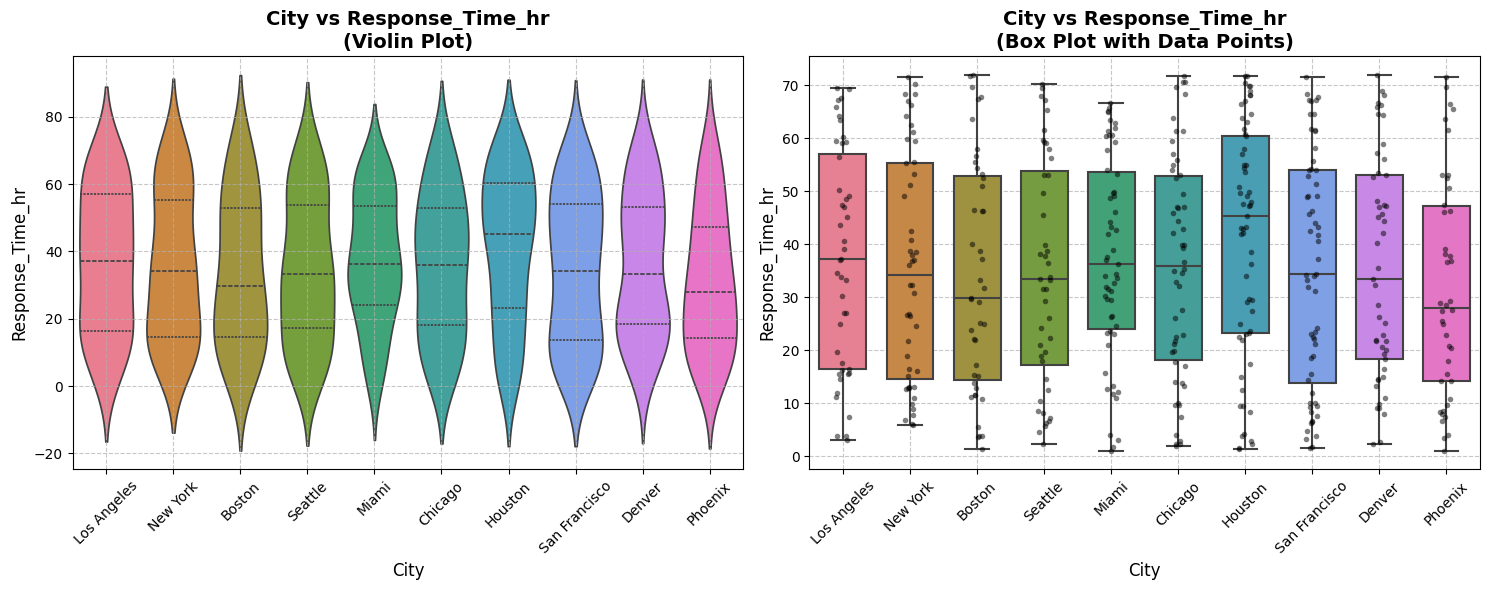

Analysis of 'City' vs 'Response_Time_hr' relationship:
ANOVA Test Results:
  F-statistic: 0.7244
  P-value: 0.6867
Conclusion: Not Significant (Significance level α=0.05)

Descriptive Statistics by Group:
               count   mean    std   min    max
City                                           
Boston            43  33.90  21.75  1.33  71.90
Chicago           54  35.62  21.03  1.88  71.76
Denver            49  35.71  20.93  2.26  71.87
Houston           61  40.99  21.98  1.47  71.72
Los Angeles       44  37.05  20.87  3.10  69.39
Miami             55  37.40  19.06  1.10  66.72
New York          48  35.45  21.39  5.89  71.62
Phoenix           42  31.48  20.74  1.11  71.47
San Francisco     60  34.95  22.03  1.57  71.46
Seattle           44  34.48  21.32  2.34  70.29




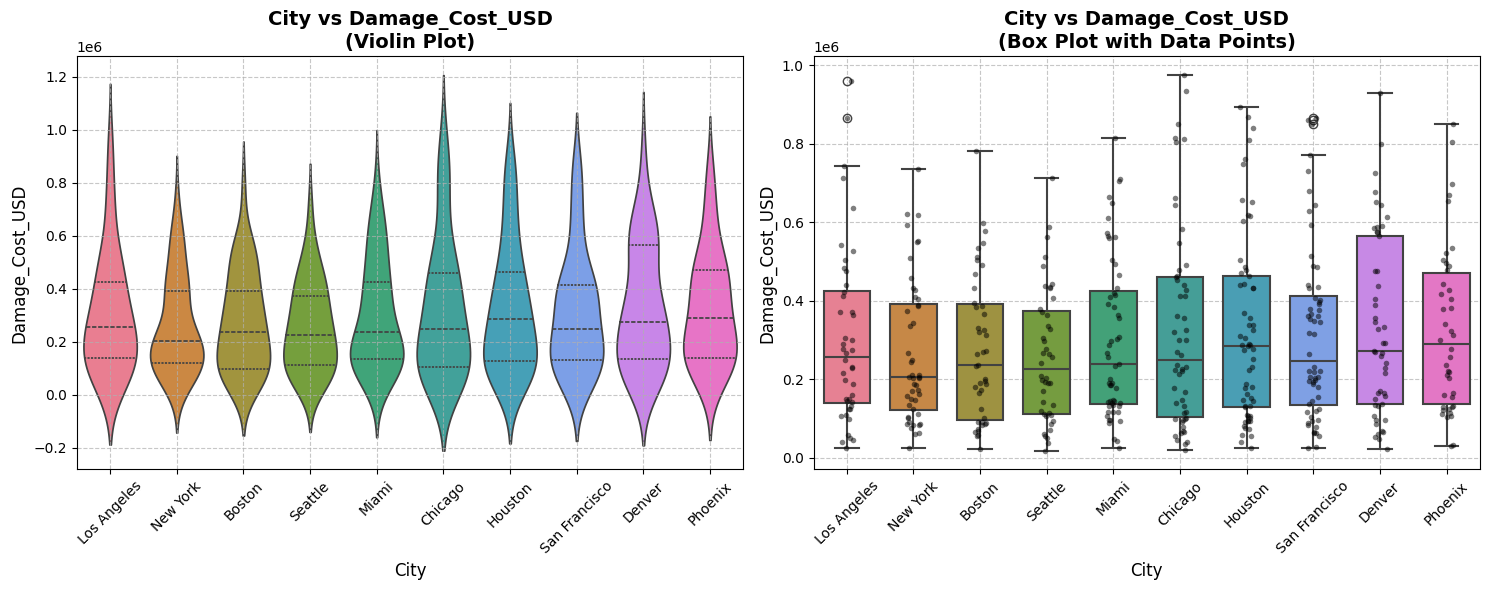

Analysis of 'City' vs 'Damage_Cost_USD' relationship:
ANOVA Test Results:
  F-statistic: 0.7434
  P-value: 0.6691
Conclusion: Not Significant (Significance level α=0.05)

Descriptive Statistics by Group:
               count       mean        std       min        max
City                                                           
Boston            43  275397.86  185357.26  21451.52  780341.54
Chicago           54  323146.76  256467.15  20644.62  974537.31
Denver            49  332610.85  231119.73  21860.61  929610.52
Houston           61  322932.35  236753.46  24967.39  892214.55
Los Angeles       44  306905.57  226248.98  24827.86  960482.77
Miami             55  301022.67  204266.97  23439.96  814917.02
New York          48  264361.43  180826.74  24215.04  734395.35
Phoenix           42  325173.86  210343.33  28807.22  850846.76
San Francisco     60  314883.44  223624.40  23504.00  866182.82
Seattle           44  258136.56  168232.18  18066.00  713689.63




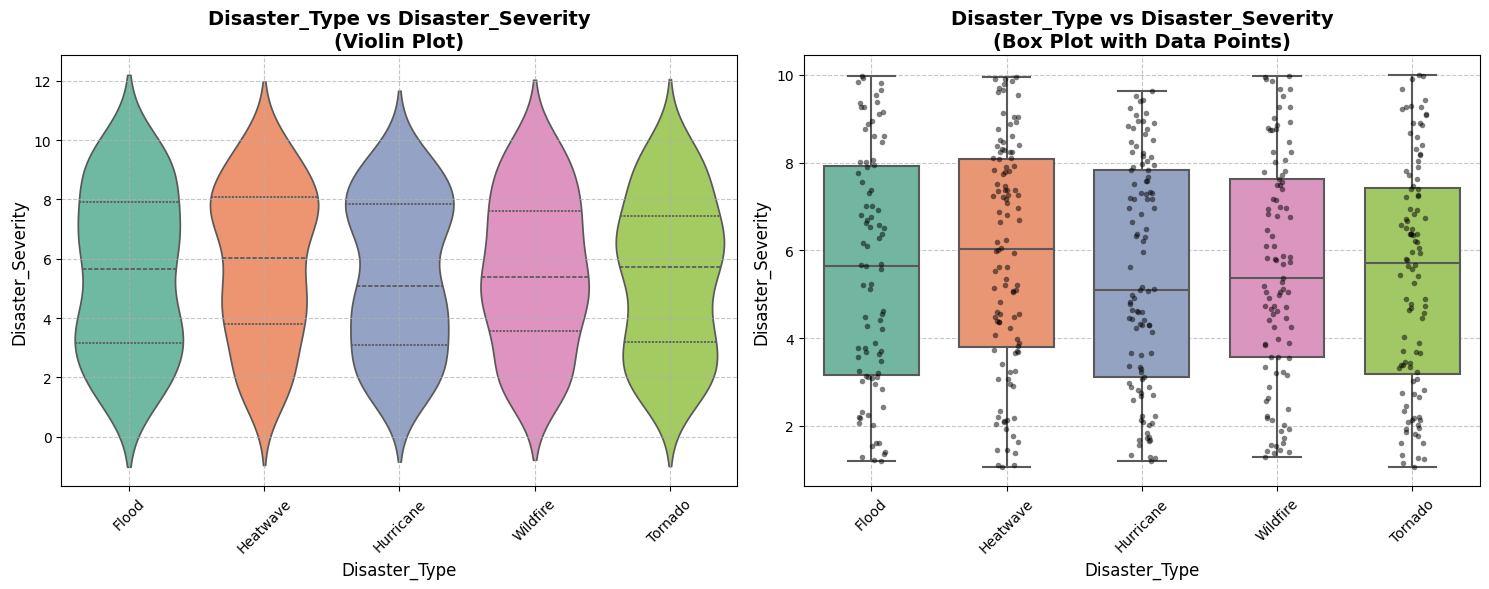

Analysis of 'Disaster_Type' vs 'Disaster_Severity' relationship:
ANOVA Test Results:
  F-statistic: 0.4757
  P-value: 0.7536
Conclusion: Not Significant (Significance level α=0.05)

Descriptive Statistics by Group:
               count  mean   std   min    max
Disaster_Type                                
Flood             86  5.55  2.70  1.21   9.98
Heatwave         108  5.86  2.58  1.07   9.96
Hurricane        105  5.44  2.57  1.19   9.64
Tornado          104  5.43  2.60  1.07  10.00
Wildfire          97  5.56  2.56  1.28   9.98




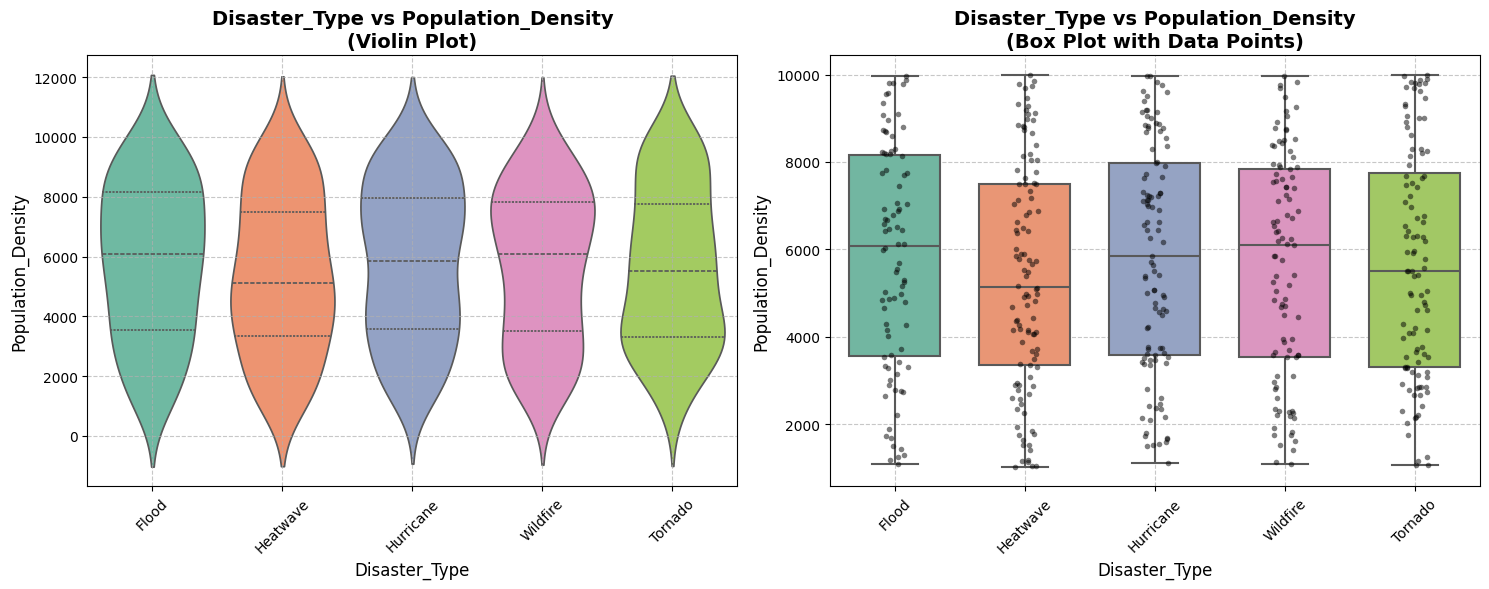

Analysis of 'Disaster_Type' vs 'Population_Density' relationship:
ANOVA Test Results:
  F-statistic: 0.4451
  P-value: 0.7760
Conclusion: Not Significant (Significance level α=0.05)

Descriptive Statistics by Group:
               count     mean      std   min   max
Disaster_Type                                     
Flood             86  5797.35  2585.02  1096  9955
Heatwave         108  5382.46  2598.43  1027  9991
Hurricane        105  5797.99  2583.20  1110  9966
Tornado          104  5627.70  2619.42  1067  9981
Wildfire          97  5635.12  2554.05  1086  9955




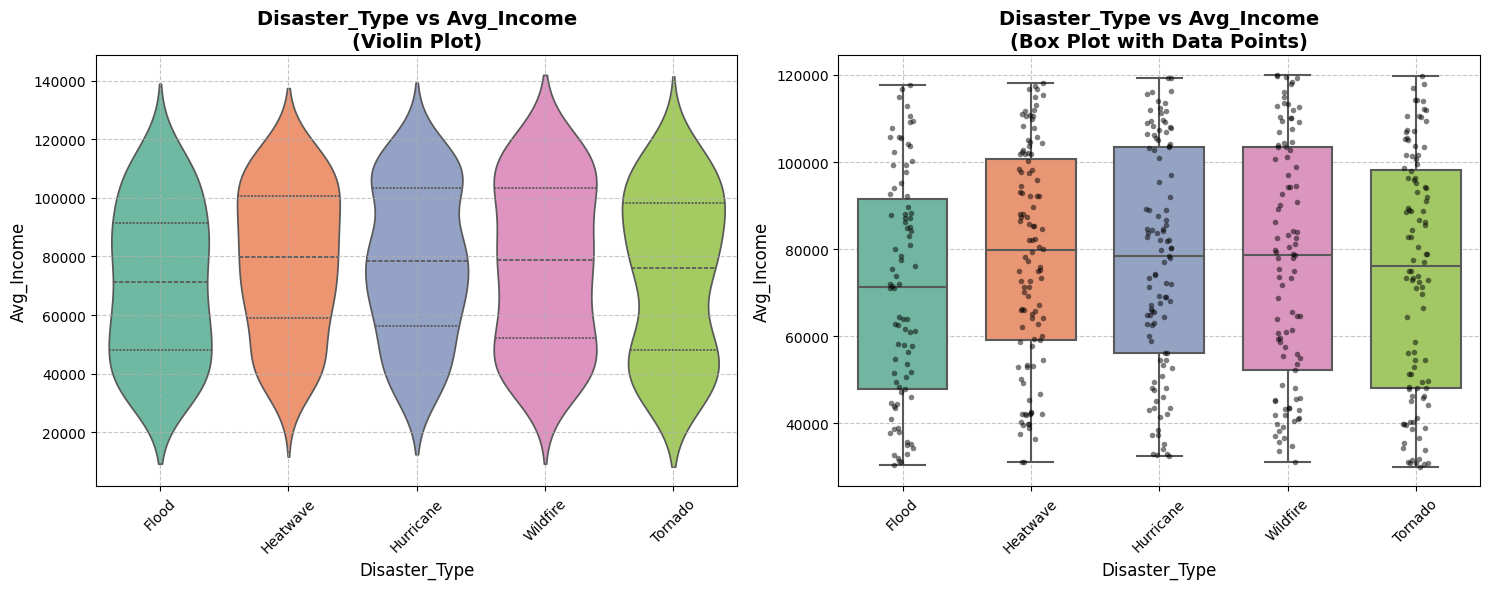

Analysis of 'Disaster_Type' vs 'Avg_Income' relationship:
ANOVA Test Results:
  F-statistic: 1.2552
  P-value: 0.2867
Conclusion: Not Significant (Significance level α=0.05)

Descriptive Statistics by Group:
               count      mean       std    min     max
Disaster_Type                                          
Flood             86  70732.56  25881.98  30464  117773
Heatwave         108  78066.02  24786.85  31075  118063
Hurricane        105  77463.38  25478.74  32540  119277
Tornado          104  74000.72  27633.79  30053  119687
Wildfire          97  76787.36  27465.60  31220  119995




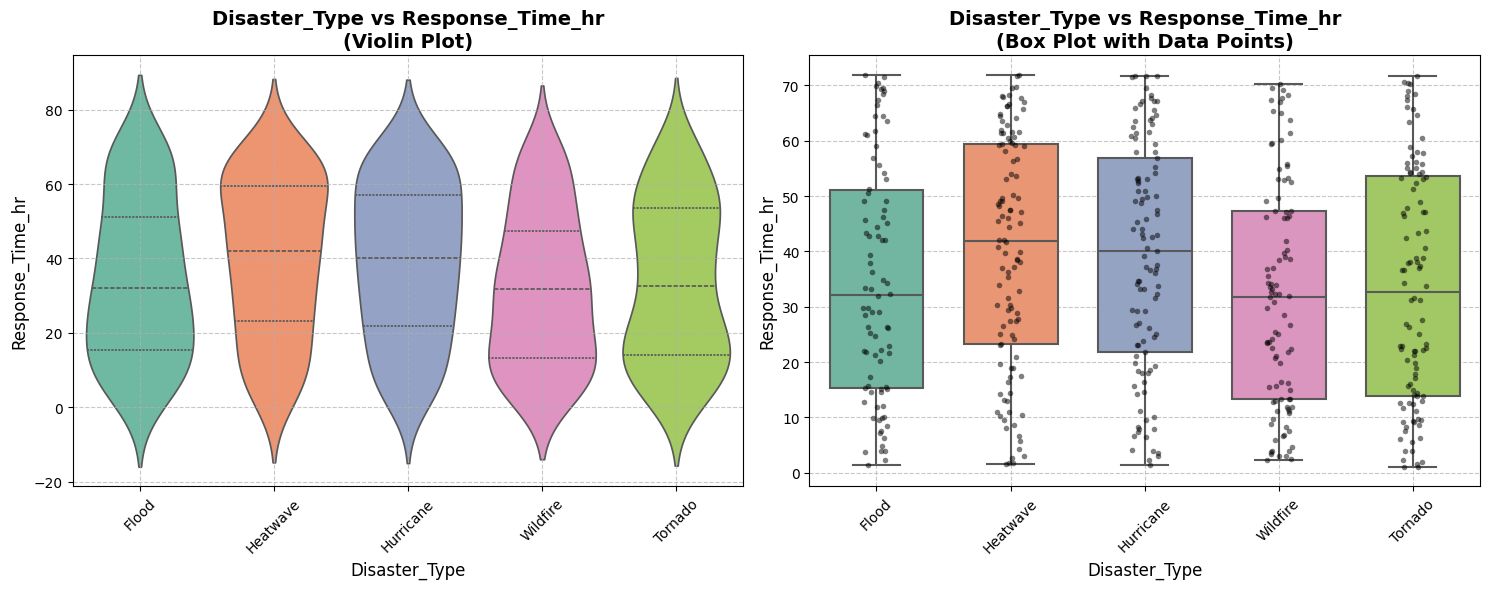

Analysis of 'Disaster_Type' vs 'Response_Time_hr' relationship:
ANOVA Test Results:
  F-statistic: 2.8096
  P-value: 0.0251
Conclusion: Significant (*) (Significance level α=0.05)

Descriptive Statistics by Group:
               count   mean    std   min    max
Disaster_Type                                  
Flood             86  34.66  21.29  1.47  71.90
Heatwave         108  39.85  20.93  1.57  71.87
Hurricane        105  38.91  20.77  1.33  71.72
Tornado          104  33.70  21.29  1.10  71.73
Wildfire          97  31.77  20.40  2.34  70.19




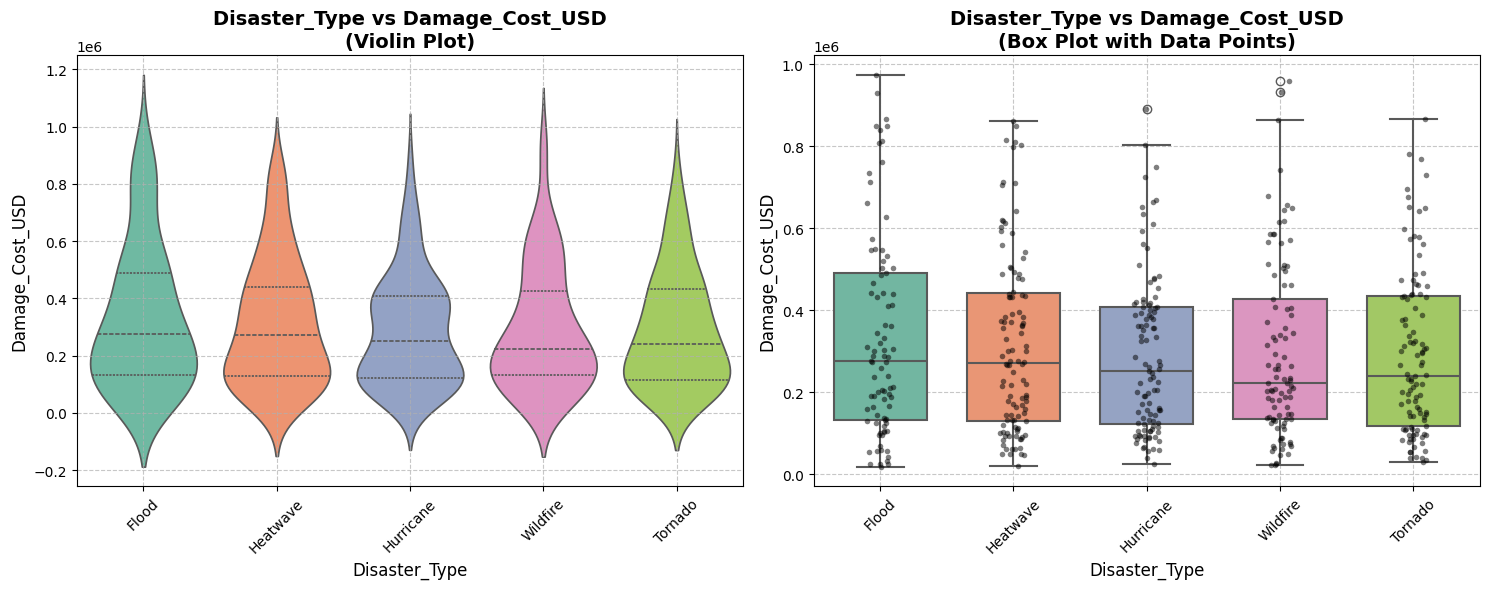

Analysis of 'Disaster_Type' vs 'Damage_Cost_USD' relationship:
ANOVA Test Results:
  F-statistic: 0.7316
  P-value: 0.5707
Conclusion: Not Significant (Significance level α=0.05)

Descriptive Statistics by Group:
               count       mean        std       min        max
Disaster_Type                                                  
Flood             86  333461.55  250749.70  18066.00  974537.31
Heatwave         108  314919.06  218199.44  20644.62  861121.26
Hurricane        105  288912.92  193345.83  23504.00  892214.55
Tornado          104  291116.74  200539.21  28807.22  867513.83
Wildfire          97  295315.95  217362.54  21451.52  960482.77




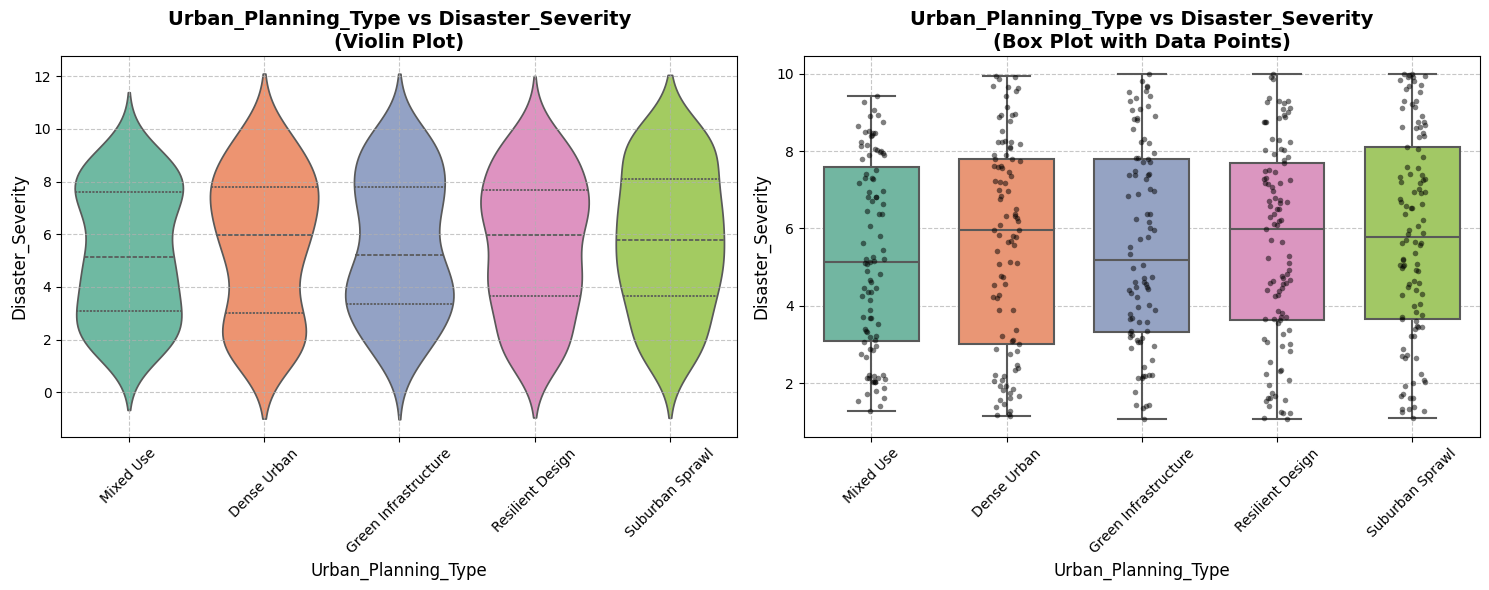

Analysis of 'Urban_Planning_Type' vs 'Disaster_Severity' relationship:
ANOVA Test Results:
  F-statistic: 0.5455
  P-value: 0.7024
Conclusion: Not Significant (Significance level α=0.05)

Descriptive Statistics by Group:
                      count  mean   std   min    max
Urban_Planning_Type                                 
Dense Urban              97  5.59  2.70  1.16   9.94
Green Infrastructure     92  5.56  2.59  1.07  10.00
Mixed Use                96  5.28  2.45  1.29   9.43
Resilient Design        105  5.58  2.57  1.07   9.98
Suburban Sprawl         110  5.81  2.65  1.10   9.98




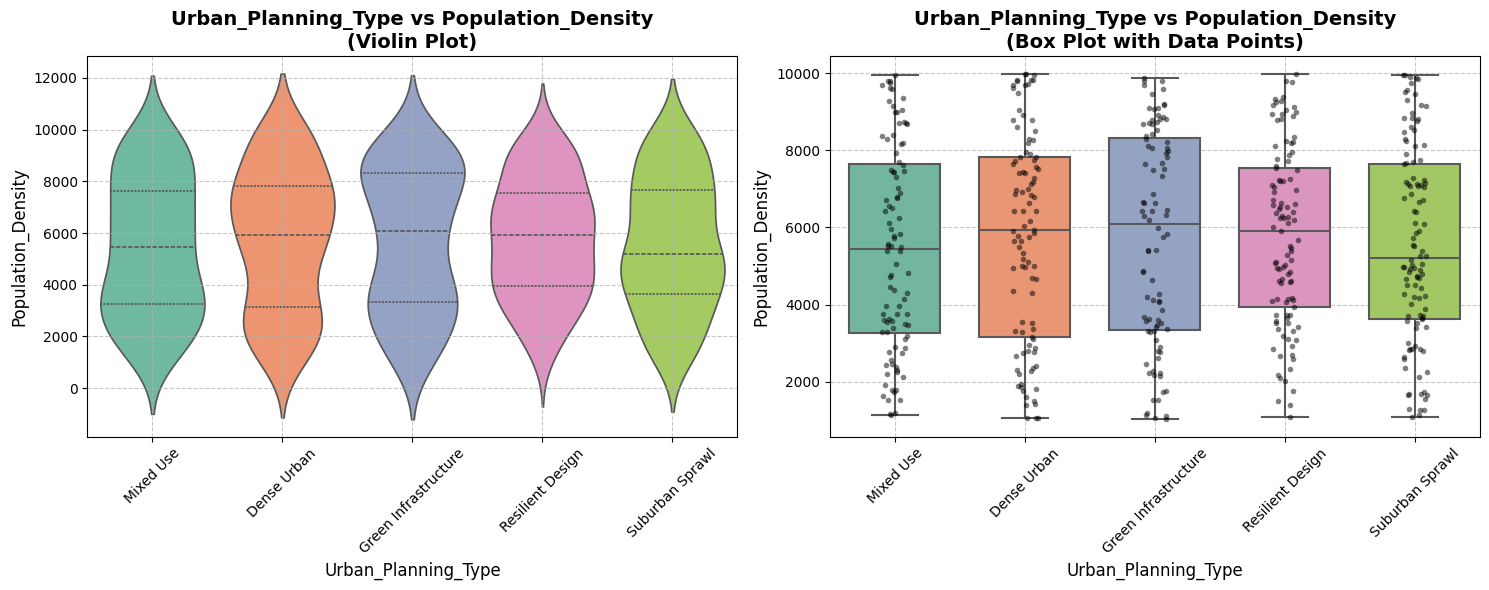

Analysis of 'Urban_Planning_Type' vs 'Population_Density' relationship:
ANOVA Test Results:
  F-statistic: 0.3114
  P-value: 0.8704
Conclusion: Not Significant (Significance level α=0.05)

Descriptive Statistics by Group:
                      count     mean      std   min   max
Urban_Planning_Type                                      
Dense Urban              97  5747.78  2715.01  1046  9991
Green Infrastructure     92  5715.92  2752.68  1027  9871
Mixed Use                96  5423.76  2651.79  1136  9955
Resilient Design        105  5760.19  2292.81  1096  9977
Suburban Sprawl         110  5560.49  2550.42  1086  9966




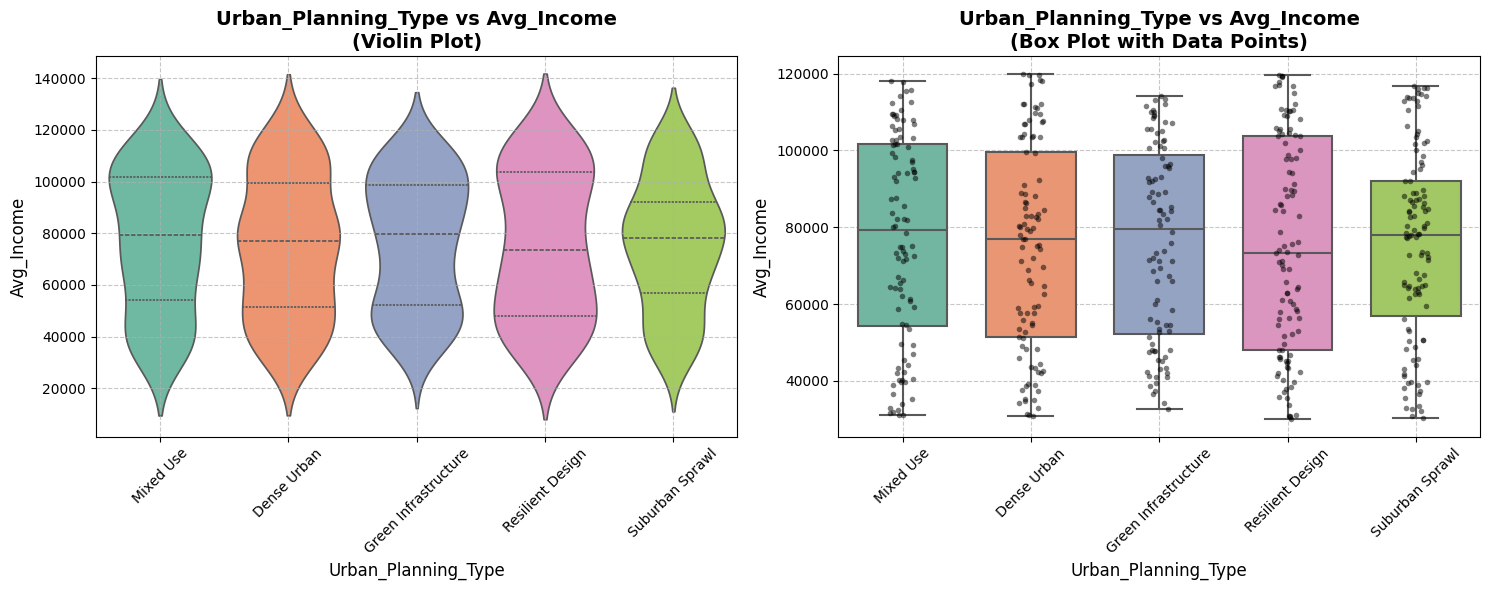

Analysis of 'Urban_Planning_Type' vs 'Avg_Income' relationship:
ANOVA Test Results:
  F-statistic: 0.1100
  P-value: 0.9790
Conclusion: Not Significant (Significance level α=0.05)

Descriptive Statistics by Group:
                      count      mean       std    min     max
Urban_Planning_Type                                           
Dense Urban              97  74630.69  26838.84  31007  119995
Green Infrastructure     92  76015.48  25148.89  32671  114192
Mixed Use                96  76892.53  26936.51  31075  117946
Resilient Design        105  75005.21  27969.03  30053  119701
Suburban Sprawl         110  75476.39  24871.94  30464  116846




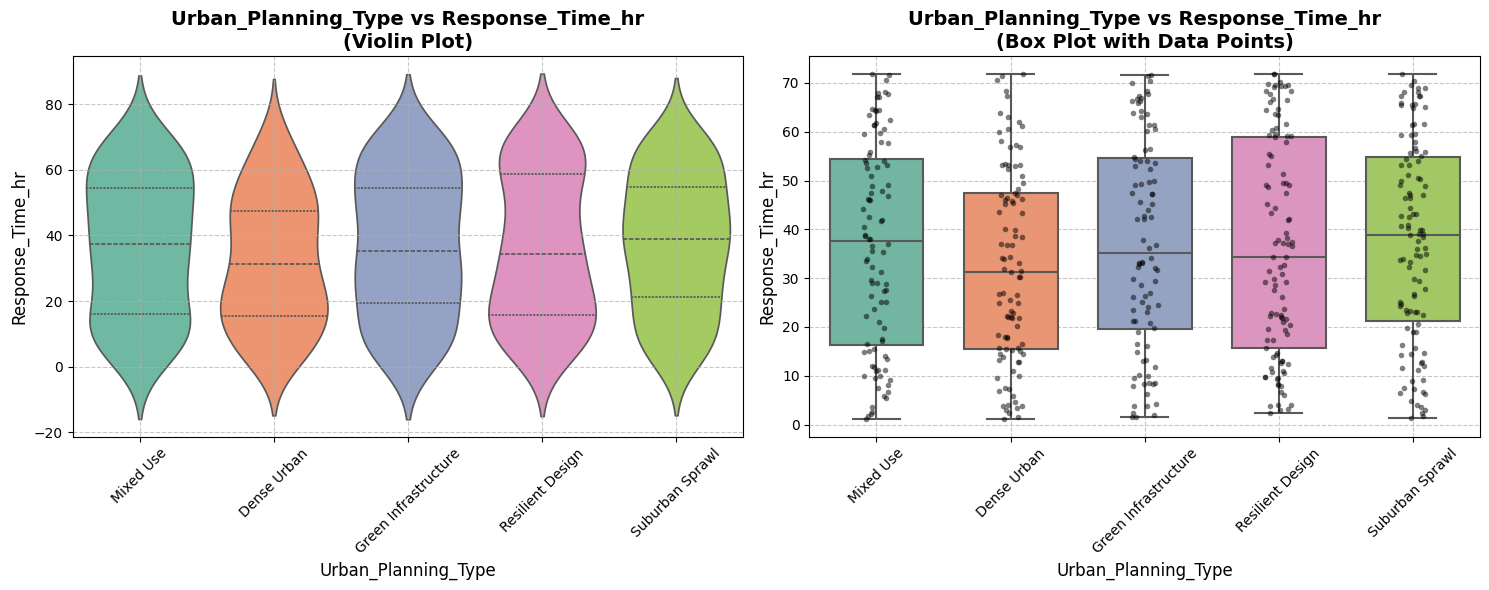

Analysis of 'Urban_Planning_Type' vs 'Response_Time_hr' relationship:
ANOVA Test Results:
  F-statistic: 0.8964
  P-value: 0.4658
Conclusion: Not Significant (Significance level α=0.05)

Descriptive Statistics by Group:
                      count   mean    std   min    max
Urban_Planning_Type                                   
Dense Urban              97  32.40  19.89  1.11  71.76
Green Infrastructure     92  36.91  21.56  1.47  71.68
Mixed Use                96  36.62  21.21  1.10  71.73
Resilient Design        105  36.02  22.10  2.38  71.90
Suburban Sprawl         110  37.45  20.64  1.33  71.87




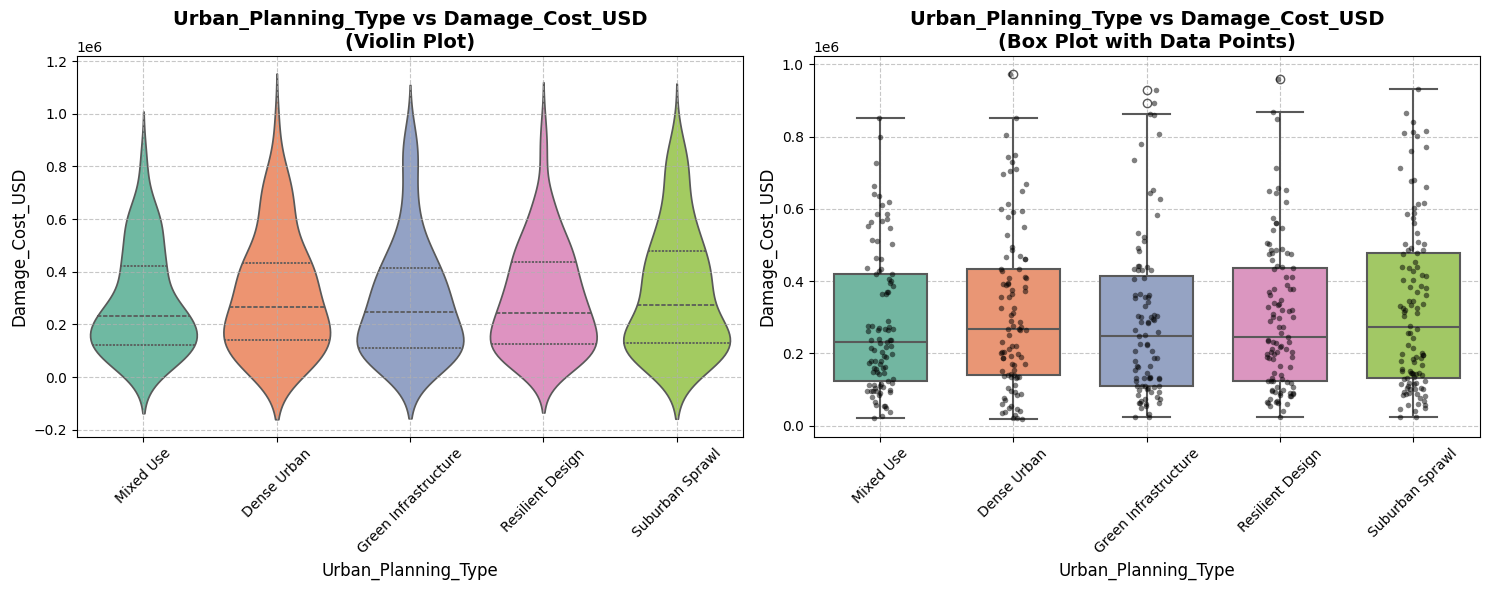

Analysis of 'Urban_Planning_Type' vs 'Damage_Cost_USD' relationship:
ANOVA Test Results:
  F-statistic: 0.6056
  P-value: 0.6588
Conclusion: Not Significant (Significance level α=0.05)

Descriptive Statistics by Group:
                      count       mean        std       min        max
Urban_Planning_Type                                                   
Dense Urban              97  316548.97  222187.71  18066.00  974537.31
Green Infrastructure     92  292781.29  222354.70  23439.96  929610.52
Mixed Use                96  284306.15  196499.40  20644.62  850579.16
Resilient Design        105  298455.08  201887.91  24827.86  960482.77
Suburban Sprawl         110  324311.76  232305.59  23504.00  933122.88




In [61]:
# ----------------------
# 4. 分类变量与数值变量的关联性分析
# ----------------------
def analyze_cat_numerical_relationship(data, cat_var, numerical_var):
    """分析分类变量与数值变量的关联性：小提琴图 + ANOVA检验"""
    # 创建图形和子图
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # 根据类别数量选择合适的调色板
    unique_cats = data[cat_var].nunique()

    if unique_cats <= 5:
        palette = sns.color_palette("Set2", unique_cats)
    elif unique_cats <= 8:
        palette = sns.color_palette("Set3", unique_cats)
    else:
        palette = sns.color_palette("husl", unique_cats)

    # 1. 小提琴图：展示不同类别下的数值变量分布
    sns.violinplot(x=cat_var, y=numerical_var, data=data, ax=ax1,
                   palette=palette, inner='quartile', saturation=0.8)
    ax1.set_title(f'{cat_var} vs {numerical_var}\n(Violin Plot)', fontsize=14, fontweight='bold')
    ax1.set_xlabel(cat_var, fontsize=12)
    ax1.set_ylabel(numerical_var, fontsize=12)
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, linestyle='--', alpha=0.7)

    # 2. 增强的箱线图：添加散点图显示数据分布
    sns.boxplot(x=cat_var, y=numerical_var, data=data, ax=ax2,
                palette=palette, width=0.7, linewidth=1.5)
    # 添加散点图显示个体数据点
    sns.stripplot(x=cat_var, y=numerical_var, data=data, ax=ax2,
                  color="black", alpha=0.5, size=4, jitter=True)
    ax2.set_title(f'{cat_var} vs {numerical_var}\n(Box Plot with Data Points)', fontsize=14, fontweight='bold')
    ax2.set_xlabel(cat_var, fontsize=12)
    ax2.set_ylabel(numerical_var, fontsize=12)
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    # ANOVA检验：判断类别间数值变量均值是否存在显著差异
    groups = [data[data[cat_var] == cat][numerical_var] for cat in data[cat_var].unique()]
    f_val, p_val = stats.f_oneway(*groups)

    # 美化输出
    print("="*60)
    print(f"Analysis of '{cat_var}' vs '{numerical_var}' relationship:")
    print("="*60)
    print(f"ANOVA Test Results:")
    print(f"  F-statistic: {f_val:.4f}")
    print(f"  P-value: {p_val:.4f}")

    # 根据P值给出更详细的结论
    if p_val < 0.001:
        significance = "Highly Significant (***)"
    elif p_val < 0.01:
        significance = "Very Significant (**)"
    elif p_val < 0.05:
        significance = "Significant (*)"
    else:
        significance = "Not Significant"

    print(f"Conclusion: {significance} (Significance level α=0.05)")

    # 计算并显示各组的描述性统计
    print("\nDescriptive Statistics by Group:")
    group_stats = data.groupby(cat_var)[numerical_var].agg(['count', 'mean', 'std', 'min', 'max'])
    print(group_stats.round(2))
    print("="*60)
    print("\n")

# 对每个分类变量×数值变量组合执行分析
for cat_var in categorical_vars:
    for num_var in numerical_vars:
        analyze_cat_numerical_relationship(data, cat_var, num_var)

异常值处理：已对数值变量进行IQR截断


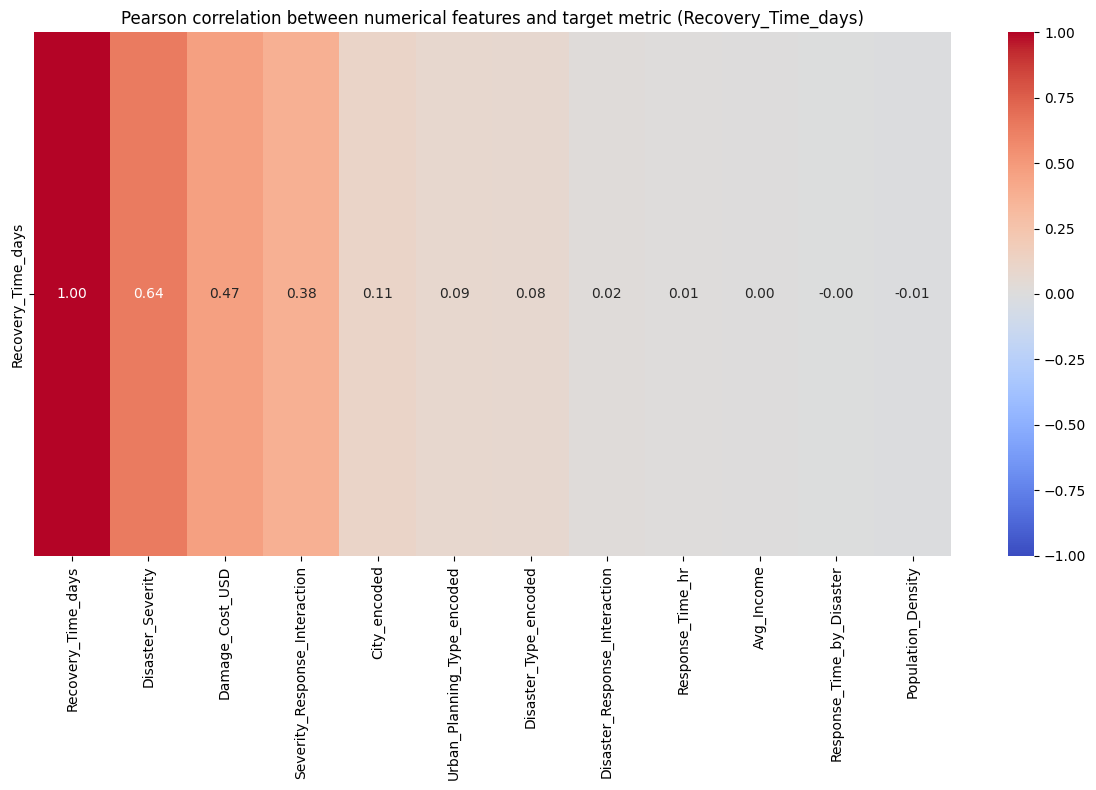

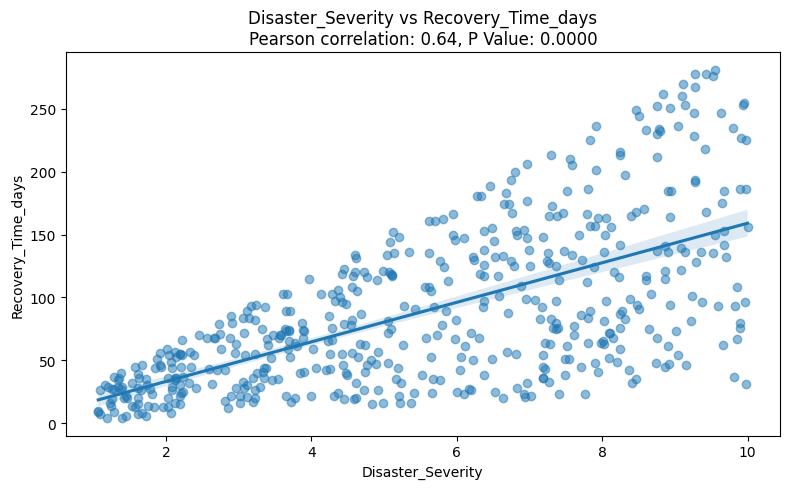

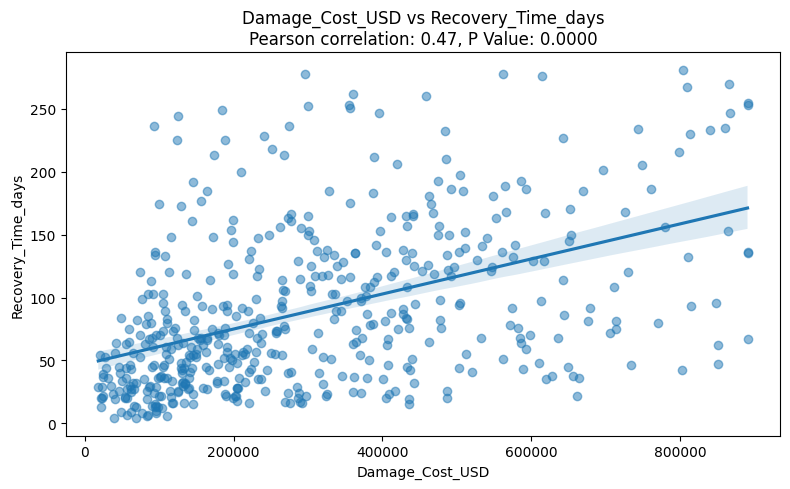

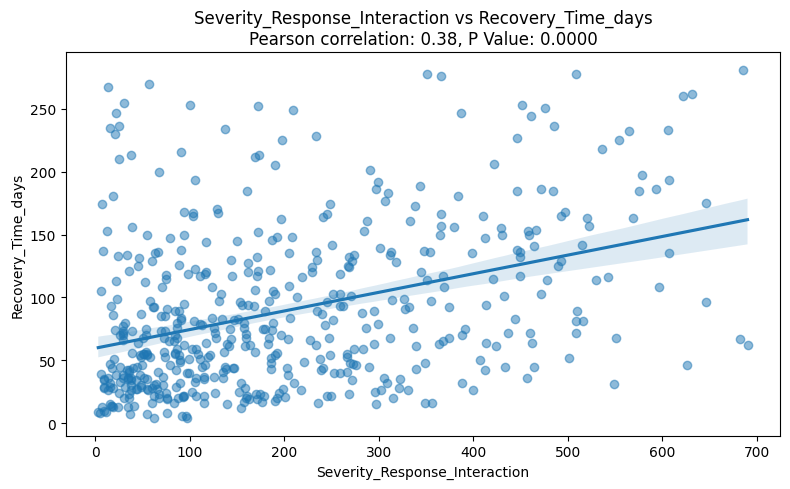

处理完成！输出路径：./data/processed_climate_data.csv


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler

# 加载之前的目标编码结果（若已保存），或重新执行目标编码
from category_encoders import TargetEncoder
encoder = TargetEncoder(smoothing=10)
categorical_vars = ['City', 'Disaster_Type', 'Urban_Planning_Type']
target_var = 'Recovery_Time_days'
for var in categorical_vars:
    data[f'{var}_encoded'] = encoder.fit_transform(data[var], data[target_var])

# 定义数值变量（含编码后的分类变量，用于后续相关性分析）
numerical_vars = [
    'Disaster_Severity', 'Population_Density', 'Avg_Income',
    'Response_Time_hr', 'Damage_Cost_USD',
    'City_encoded', 'Disaster_Type_encoded', 'Urban_Planning_Type_encoded'
]
target_var = 'Recovery_Time_days'


# ----------------------
# 2. 数值特征预处理（缺失值+异常值）
# ----------------------
def preprocess_numerical_features(data, numerical_vars):
    """处理数值特征的缺失值和异常值"""
    df = data.copy()

    # （1）缺失值处理：小样本下用分组中位数填充（利用Disaster_Type与Response_Time_hr的关联）
    for var in numerical_vars:
        if df[var].isnull().sum() > 0:
            # 对Response_Time_hr，按Disaster_Type分组填充（因二者显著相关）
            if var == 'Response_Time_hr':
                df[var] = df.groupby('Disaster_Type')[var].transform(
                    lambda x: x.fillna(x.median())
                )
            else:
                # 其他变量用全局中位数填充
                df[var] = df[var].fillna(df[var].median())
            print(f"缺失值处理：{var} 填充了 {data[var].isnull().sum()} 条缺失")

    # （2）异常值处理：用IQR法则截断（避免删除样本，保留小样本信息）
    for var in numerical_vars:
        if var not in ['Disaster_Severity']:  # 灾害严重度是1-10的评分，无异常值
            q1 = df[var].quantile(0.25)
            q3 = df[var].quantile(0.75)
            iqr = q3 - q1
            upper_bound = q3 + 1.5 * iqr
            lower_bound = q1 - 1.5 * iqr
            # 截断异常值
            df[var] = np.where(df[var] > upper_bound, upper_bound, df[var])
            df[var] = np.where(df[var] < lower_bound, lower_bound, df[var])
    print("异常值处理：已对数值变量进行IQR截断")

    # （3）标准化：对大数值变量（如收入、损失成本）标准化，不改变分布但统一尺度
    scaler = StandardScaler()
    scale_vars = ['Population_Density', 'Avg_Income', 'Damage_Cost_USD']
    df[[f'{var}_scaled' for var in scale_vars]] = scaler.fit_transform(df[scale_vars])

    return df

# 执行预处理
processed_data = preprocess_numerical_features(data, numerical_vars)


# ----------------------
# 3. 利用显著关联构造衍生特征（核心）
# ----------------------
# 基于"Disaster_Type与Response_Time_hr显著相关"，构造交互特征
def create_derived_features(df):
    df_new = df.copy()
    # （1）不同灾害类型下的响应时间标准化值（突出组内差异）
    df_new['Response_Time_by_Disaster'] = df_new.groupby('Disaster_Type')['Response_Time_hr'].transform(
        lambda x: (x - x.mean()) / x.std()  # 组内Z-score
    )
    # （2）灾害类型编码 × 响应时间（放大二者协同影响）
    df_new['Disaster_Response_Interaction'] = df_new['Disaster_Type_encoded'] * df_new['Response_Time_hr']
    # （3）灾害严重度 × 响应时间（直接影响恢复时间的潜在因素）
    df_new['Severity_Response_Interaction'] = df_new['Disaster_Severity'] * df_new['Response_Time_hr']
    return df_new

# 生成衍生特征
processed_data = create_derived_features(processed_data)
# 新增特征加入分析列表
derived_vars = ['Response_Time_by_Disaster', 'Disaster_Response_Interaction', 'Severity_Response_Interaction']
all_analysis_vars = numerical_vars + derived_vars + [target_var]


# ----------------------
# 4. 数值特征相关性分析
# ----------------------
def analyze_correlations(df, vars_list, target_var):
    """计算相关性并可视化"""
    # （1）计算皮尔逊（线性）和斯皮尔曼（非线性）相关系数
    corr_pearson = df[vars_list].corr(method='pearson')
    corr_spearman = df[vars_list].corr(method='spearman')

    # （2）可视化：相关性热力图（重点展示与目标变量的关联）
    plt.figure(figsize=(12, 8))
    # 提取与目标变量的相关性（按绝对值排序）
    target_corr = corr_pearson[target_var].sort_values(ascending=False)
    sns.heatmap(
        pd.DataFrame(target_corr).T,  # 转置为单行热力图
        annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f'
    )
    plt.title(f'Pearson correlation between numerical features and target metric ({target_var})', fontsize=12)
    plt.tight_layout()
    plt.show()

    # （3）关键变量与目标变量的散点图（带回归线）
    # 选择与目标变量相关性 top3 的特征
    top_corr_vars = target_corr.drop(target_var).abs().sort_values(ascending=False).index[:3]
    for var in top_corr_vars:
        plt.figure(figsize=(8, 5))
        sns.regplot(x=var, y=target_var, data=df, scatter_kws={'alpha':0.5})
        # 计算相关系数及P值
        r, p = pearsonr(df[var], df[target_var])
        plt.title(f'{var} vs {target_var}\nPearson correlation: {r:.2f}, P Value: {p:.4f}', fontsize=12)
        plt.tight_layout()
        plt.show()

    return corr_pearson, corr_spearman

# 执行相关性分析
corr_pearson, corr_spearman = analyze_correlations(
    processed_data,
    all_analysis_vars,
    target_var
)


# ----------------------
# 5. 输出处理后的数据集（用于后续建模）
# ----------------------
# 保留原始数值特征、编码特征、衍生特征和目标变量
final_features = [
    'Disaster_Severity', 'Population_Density_scaled', 'Avg_Income_scaled',
    'Response_Time_hr', 'Damage_Cost_USD_scaled',
    'City_encoded', 'Disaster_Type_encoded', 'Urban_Planning_Type_encoded',
    'Response_Time_by_Disaster', 'Disaster_Response_Interaction', 'Severity_Response_Interaction',
    'Recovery_Time_days'
]
processed_data[final_features].to_csv('./data/processed_climate_data.csv', index=False)
print("处理完成！输出路径：./data/processed_climate_data.csv")

In [32]:
def full_analyze_correlations(df, vars_list, target_var):
    """计算相关性并可视化"""
    # （1）计算皮尔逊（线性）和斯皮尔曼（非线性）相关系数
    corr_pearson = df[vars_list].corr(method='pearson')
    corr_spearman = df[vars_list].corr(method='spearman')

    # 按与目标变量的相关性绝对值排序（目标变量排第一）
    target_corr = corr_pearson[target_var].abs().sort_values(ascending=False)
    sorted_vars = target_corr.index.tolist()
    corr_pearson_sorted = corr_pearson.loc[sorted_vars, sorted_vars]
    corr_spearman_sorted = corr_spearman.loc[sorted_vars, sorted_vars]

    # （2）可视化：正方形相关性热力图
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # 皮尔逊相关性热力图
    sns.heatmap(
        corr_pearson_sorted,
        annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f',
        square=True, cbar_kws={"shrink": 0.8}, ax=ax1
    )
    ax1.set_title('Pearson Correlation Matrix\n(Linear Relationships)', fontsize=14)

    # 斯皮尔曼相关性热力图
    sns.heatmap(
        corr_spearman_sorted,
        annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f',
        square=True, cbar_kws={"shrink": 0.8}, ax=ax2
    )
    ax2.set_title('Spearman Correlation Matrix\n(Non-linear Relationships)', fontsize=14)

    plt.tight_layout()
    plt.show()

    # （3）返回相关系数矩阵
    return corr_pearson_sorted, corr_spearman_sorted

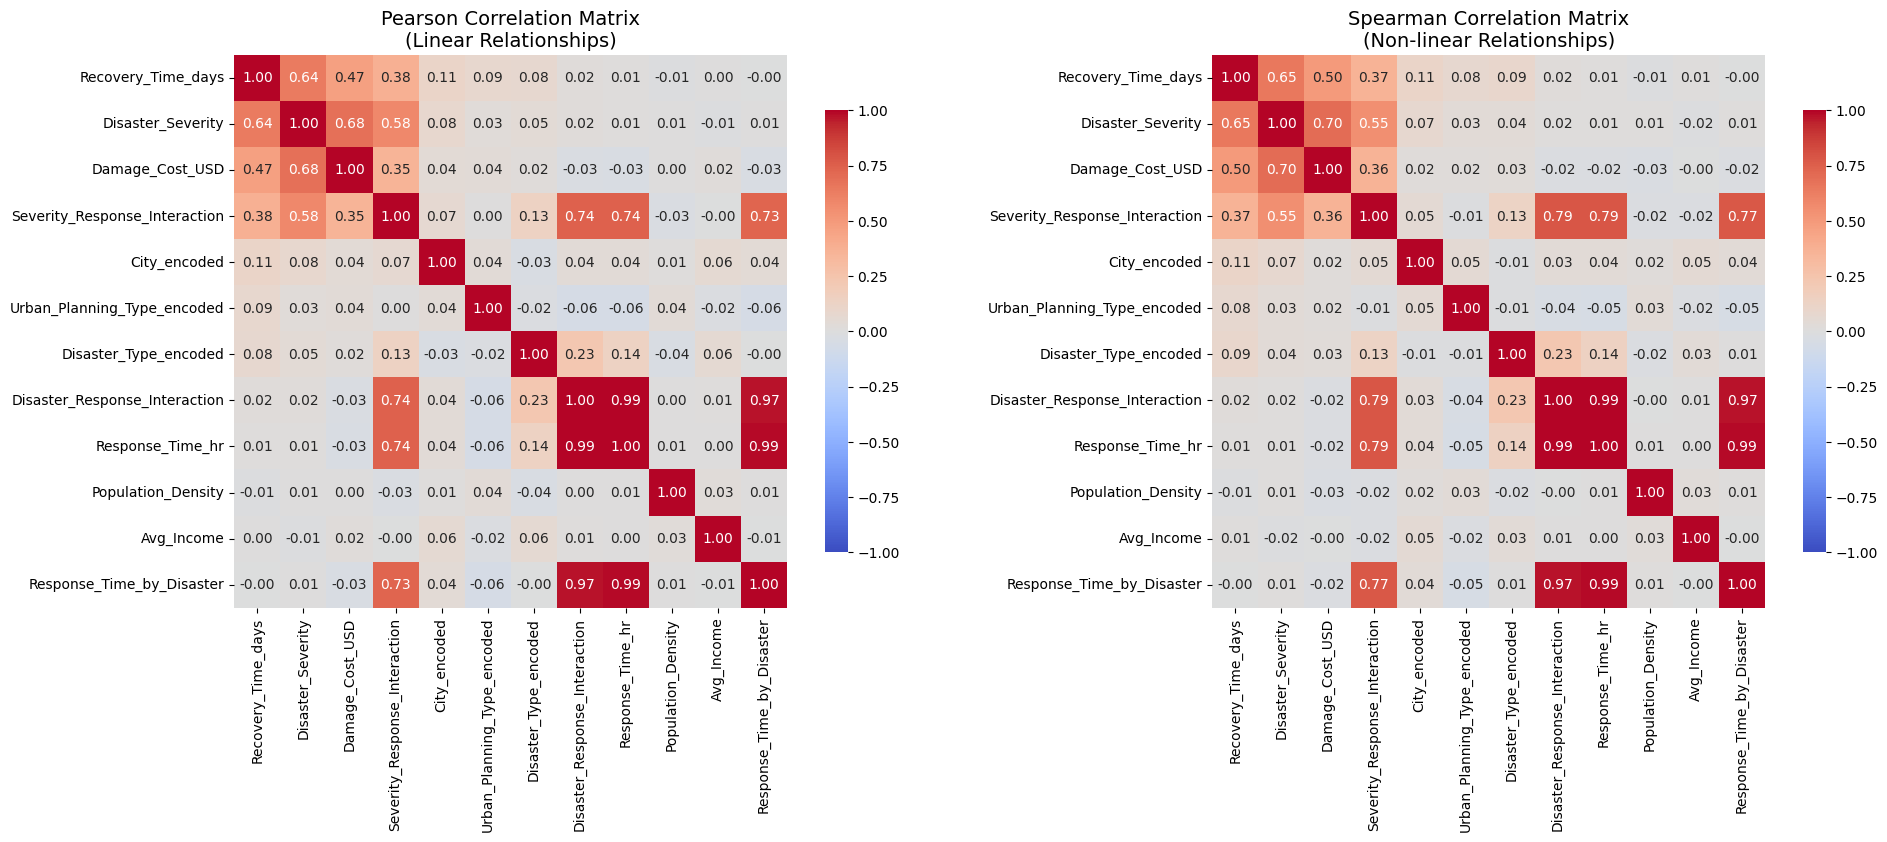

In [35]:
corr_pearson, corr_spearman = full_analyze_correlations(
    processed_data,
    all_analysis_vars,
    target_var
)

Training samples: 400, Test samples: 100

Training XGBoost model...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
XGBoost best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Test performance: RMSE=61.89, MAE=49.32, R²=0.37

Training GradientBoosting model...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
GradientBoosting best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Test performance: RMSE=61.95, MAE=49.35, R²=0.37

Training LightGBM model...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 881
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 11
[LightGBM] [Info] Start training from score 84.812500
[Li

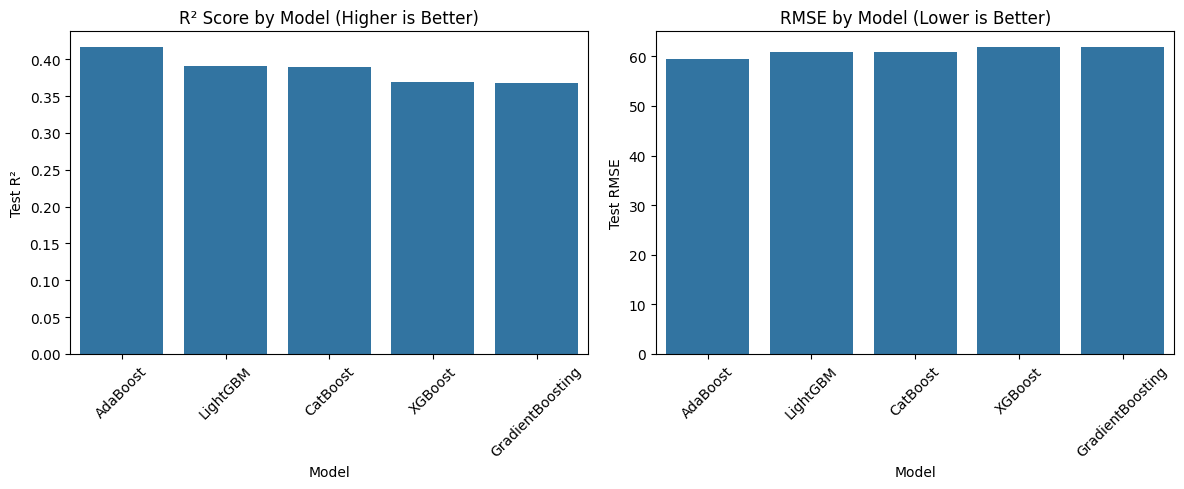


Best model: AdaBoost


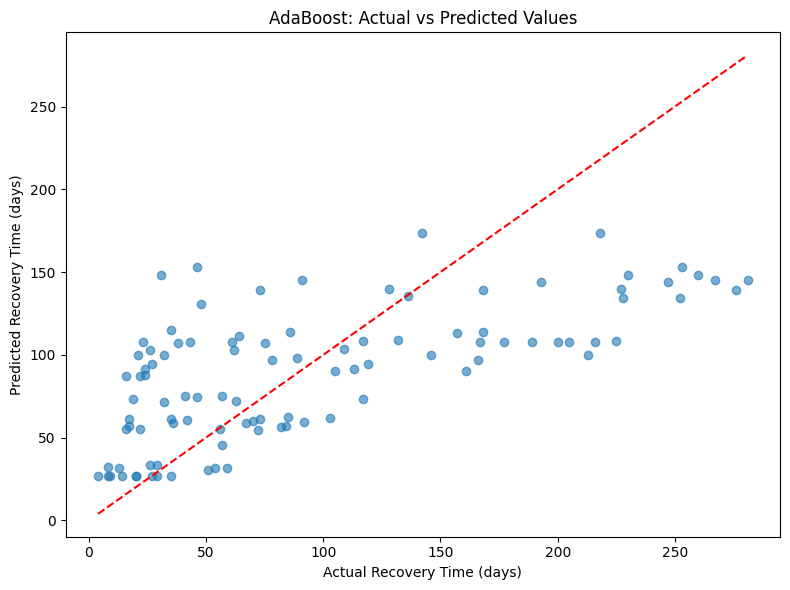

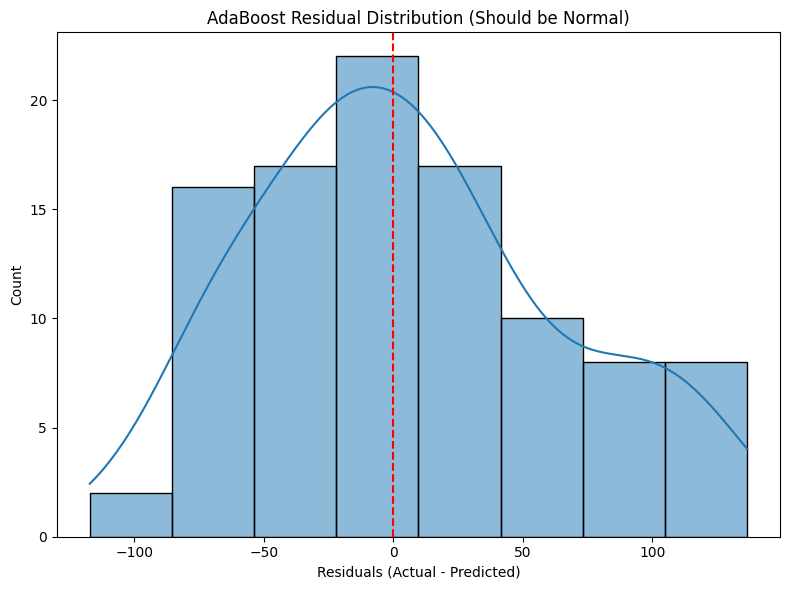


Best model saved as: ./AdaBoost_best_model.pkl


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
import shap
import joblib  # For saving models

# ----------------------
# 1. Load processed data
# ----------------------
data = pd.read_csv("./data/processed_climate_data.csv")
# Feature and target variable separation
X = data.drop('Recovery_Time_days', axis=1)  # All features
y = data['Recovery_Time_days']  # Target variable (Recovery Time)

# Dataset split: 80% training, 20% testing (higher training ratio for small datasets)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # Fixed random seed for reproducibility
)
print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


# ----------------------
# 2. Define models and hyperparameter grids (optimized for small samples to prevent overfitting)
# ----------------------
# 5-fold cross-validation (more stable for small samples)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Model list and hyperparameter grids (focus on controlling complexity to avoid overfitting)
models = {
    # Required model 1: XGBoost
    'XGBoost': {
        'model': xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
        'params': {
            'max_depth': [3, 5],  # Limit tree depth to prevent overfitting
            'learning_rate': [0.01, 0.1],
            'n_estimators': [100, 200],
            'subsample': [0.8, 1.0],  # Sample subsampling to reduce overfitting
            'colsample_bytree': [0.8, 1.0]  # Feature subsampling
        }
    },
    # Required model 2: Gradient Boosting (sklearn)
    'GradientBoosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'max_depth': [3, 5],
            'learning_rate': [0.01, 0.1],
            'n_estimators': [100, 200],
            'subsample': [0.8, 1.0]
        }
    },
    # Additional model 1: LightGBM
    'LightGBM': {
        'model': lgb.LGBMRegressor(random_state=42),
        'params': {
            'num_leaves': [20, 31],  # Control number of leaves (less than 2^max_depth)
            'learning_rate': [0.01, 0.1],
            'n_estimators': [100, 200],
            'max_depth': [3, 5],
            'subsample': [0.8, 1.0]
        }
    },
    # Additional model 2: CatBoost
    'CatBoost': {
        'model': CatBoostRegressor(silent=True, random_state=42),  # silent=True to suppress iteration logs
        'params': {
            'depth': [3, 5],
            'learning_rate': [0.01, 0.1],
            'iterations': [100, 200],
            'l2_leaf_reg': [5, 10]  # L2 regularization to prevent overfitting
        }
    },
    # Additional model 3: AdaBoost
    'AdaBoost': {
        'model': AdaBoostRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1]
        }
    }
}


# ----------------------
# 3. Model training and hyperparameter tuning
# ----------------------
# Store best models and evaluation results
best_models = {}
results = []

for name, config in models.items():
    print(f"\nTraining {name} model...")
    # Grid search with cross-validation
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=cv,
        scoring='neg_mean_squared_error',  # Use negative MSE as scoring (higher is better)
        n_jobs=-1,  # Parallel computation (use all CPU cores)
        verbose=1  # Output tuning process
    )
    grid_search.fit(X_train, y_train)

    # Save best model
    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    # Evaluate on test set
    y_pred = best_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results.append({
        'Model': name,
        'Best Parameters': grid_search.best_params_,
        'Test RMSE': rmse,
        'Test MAE': mae,
        'Test R²': r2
    })

    print(f"{name} best parameters: {grid_search.best_params_}")
    print(f"Test performance: RMSE={rmse:.2f}, MAE={mae:.2f}, R²={r2:.2f}")


# ----------------------
# 4. Model performance comparison
# ----------------------
# Convert results to DataFrame and sort by R² (descending)
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Test R²', ascending=False).reset_index(drop=True)

# Print comparison table
print("\nModel Performance Comparison:")
print(results_df[['Model', 'Test RMSE', 'Test MAE', 'Test R²']])

# Visualization: Compare R² and RMSE across models
plt.figure(figsize=(12, 5))
# Subplot 1: R² comparison
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='Test R²', data=results_df)
plt.title('R² Score by Model (Higher is Better)')
plt.xticks(rotation=45)
# Subplot 2: RMSE comparison
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='Test RMSE', data=results_df)
plt.title('RMSE by Model (Lower is Better)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ----------------------
# 5. Best model analysis (using the model with highest R²)
# ----------------------
best_model_name = results_df.iloc[0]['Model']
best_model = best_models[best_model_name]
print(f"\nBest model: {best_model_name}")

# (1) Actual vs Predicted values visualization
y_pred_best = best_model.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Ideal line (predicted = actual)
plt.xlabel('Actual Recovery Time (days)')
plt.ylabel('Predicted Recovery Time (days)')
plt.title(f'{best_model_name}: Actual vs Predicted Values')
plt.tight_layout()
plt.show()

# (2) Residual analysis (residual = actual - predicted)
residuals = y_test - y_pred_best
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals (Actual - Predicted)')
plt.title(f'{best_model_name} Residual Distribution (Should be Normal)')
plt.axvline(x=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

# (3) Feature importance analysis (for tree-based models)
if best_model_name in ['XGBoost', 'GradientBoosting', 'LightGBM', 'CatBoost']:
    # Extract feature importance
    if best_model_name == 'XGBoost':
        importance = best_model.feature_importances_
    elif best_model_name == 'LightGBM':
        importance = best_model.feature_importances_
    elif best_model_name == 'CatBoost':
        importance = best_model.get_feature_importance()
    else:  # GradientBoosting
        importance = best_model.feature_importances_

    # Visualize feature importance
    feat_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feat_importance.head(10))  # Show top 10 features
    plt.title(f'{best_model_name} Feature Importance (Top 10)')
    plt.tight_layout()
    plt.show()

# (4) SHAP value analysis (enhanced model interpretability)
if best_model_name in ['XGBoost', 'LightGBM', 'CatBoost']:
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_test)
    # Plot SHAP summary
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type="bar", show=False)
    plt.title(f'{best_model_name} SHAP Feature Importance (Global Impact)')
    plt.tight_layout()
    plt.show()


# ----------------------
# 6. Save the best model
# ----------------------
joblib.dump(best_model, f'./{best_model_name}_best_model.pkl')
print(f"\nBest model saved as: ./{best_model_name}_best_model.pkl")

Training set: (400, 11), Test set: (100, 11)

===== Tuning LightGBM Model =====
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 881
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 11
[LightGBM] [Info] Start training from score 84.812500
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosin

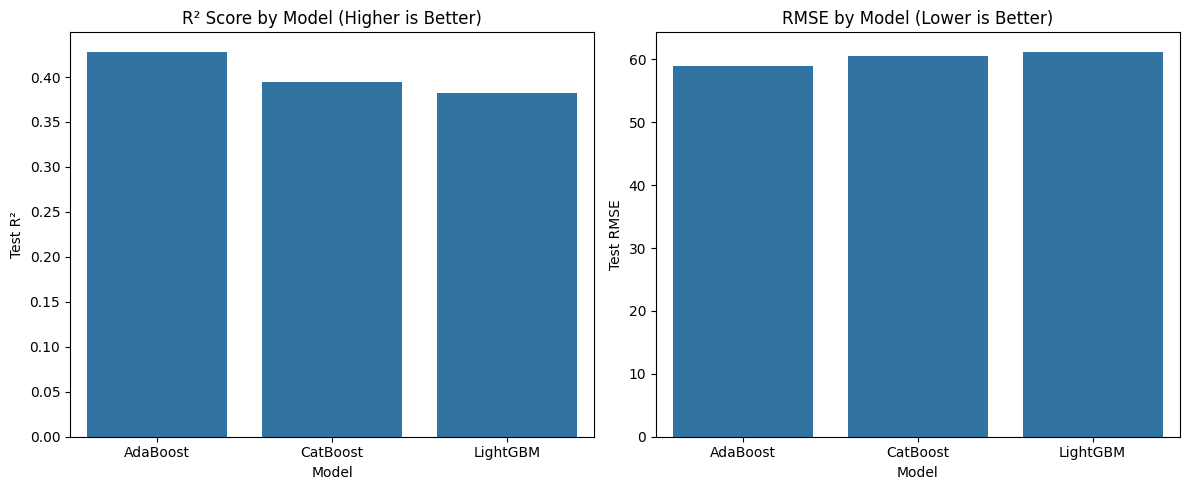


===== Best Model: AdaBoost =====


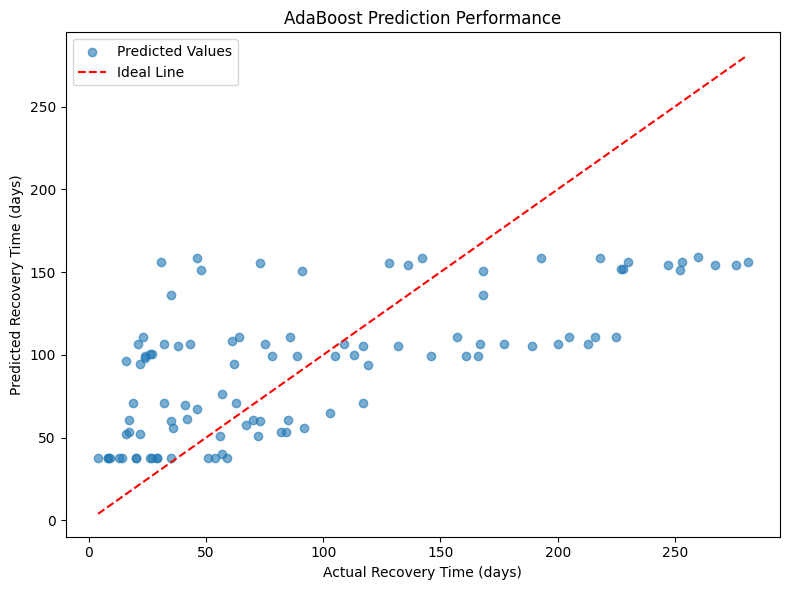

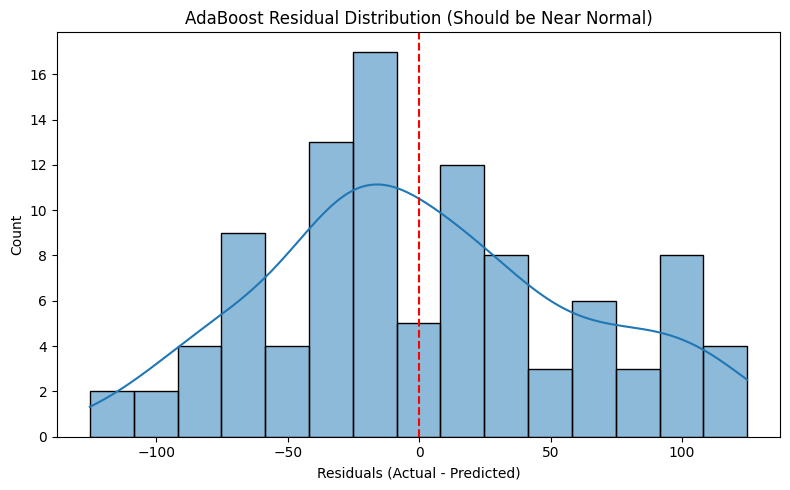


Tuned best model saved as: ./tuned_AdaBoost_best_model.pkl


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor  # Base estimator for AdaBoost
import lightgbm as lgb
from catboost import CatBoostRegressor
import shap
import joblib
import warnings
warnings.filterwarnings('ignore')

# ----------------------
# 1. Data Loading and Splitting
# ----------------------
data = pd.read_csv("./data/processed_climate_data.csv")
X = data.drop('Recovery_Time_days', axis=1)
y = data['Recovery_Time_days']

# Consistent train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")


# ----------------------
# 2. Refined Parameter Grids (Fixed AdaBoost parameter name)
# ----------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)

models = {
    'LightGBM': {
        'model': lgb.LGBMRegressor(random_state=42),
        'params': {
            'num_leaves': [15, 20, 31, 40],
            'max_depth': [3, 4, 5],
            'learning_rate': [0.01, 0.05, 0.1],
            'n_estimators': [100, 200, 300],
            'min_data_in_leaf': [5, 10, 15],
            'subsample': [0.7, 0.8, 0.9, 1.0],
            'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
            'reg_alpha': [0, 0.1, 0.5],
            'reg_lambda': [0, 0.1, 0.5, 1.0]
        },
        'n_iter': 20
    },
'AdaBoost': {
    'model': AdaBoostRegressor(random_state=42),
    'params': {
        'n_estimators': [30, 50, 80],
        'learning_rate': [0.01, 0.05, 0.1],
        'estimator': [
            DecisionTreeRegressor(max_depth=1),
            DecisionTreeRegressor(max_depth=2, min_samples_leaf=5),
            DecisionTreeRegressor(max_depth=3, min_samples_leaf=10)
        ]
    },
    'n_iter': 20  # 可以增加搜索次数，但不要太多，小数据量避免过拟合
},
    'CatBoost': {
        'model': CatBoostRegressor(silent=True, random_state=42),
        'params': {
            'depth': [3, 4, 5, 6],
            'learning_rate': [0.01, 0.05, 0.1],
            'iterations': [100, 200, 300],
            'l2_leaf_reg': [5, 10, 15, 20],
            'subsample': [0.7, 0.8, 0.9, 1.0],
            'random_strength': [0, 2, 4]
        },
        'n_iter': 18
    }
}


# ----------------------
# 3. Randomized Search and Training
# ----------------------
best_models = {}
results = []

for name, config in models.items():
    print(f"\n===== Tuning {name} Model =====")
    random_search = RandomizedSearchCV(
        estimator=config['model'],
        param_distributions=config['params'],
        n_iter=config['n_iter'],
        cv=cv,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        random_state=42,
        verbose=1
    )
    random_search.fit(X_train, y_train)

    best_model = random_search.best_estimator_
    best_models[name] = best_model
    y_pred = best_model.predict(X_test)

    # Evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Best Parameters': random_search.best_params_,
        'Test RMSE': rmse,
        'Test MAE': mae,
        'Test R²': r2
    })

    print(f"Best Parameters: {random_search.best_params_}")
    print(f"Performance: RMSE={rmse:.2f}, MAE={mae:.2f}, R²={r2:.2f}")


# ----------------------
# 4. Post-Tuning Performance Comparison
# ----------------------
results_df = pd.DataFrame(results).sort_values(by='Test R²', ascending=False).reset_index(drop=True)
print("\n===== Post-Tuning Model Performance =====")
print(results_df[['Model', 'Test RMSE', 'Test MAE', 'Test R²']])

# Visualization (all legends in English)
plt.figure(figsize=(12, 5))
# R² Comparison
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='Test R²', data=results_df)
plt.title('R² Score by Model (Higher is Better)')
plt.xticks(rotation=0)
# RMSE Comparison
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='Test RMSE', data=results_df)
plt.title('RMSE by Model (Lower is Better)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# ----------------------
# 5. In-Depth Analysis of Best Model
# ----------------------
best_model_name = results_df.iloc[0]['Model']
best_model = best_models[best_model_name]
print(f"\n===== Best Model: {best_model_name} =====")

# (1) Predicted vs Actual Values
y_pred_best = best_model.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, label='Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal Line')
plt.xlabel('Actual Recovery Time (days)')
plt.ylabel('Predicted Recovery Time (days)')
plt.title(f'{best_model_name} Prediction Performance')
plt.legend()
plt.tight_layout()
plt.show()

# (2) Residual Distribution
residuals = y_test - y_pred_best
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=15)
plt.xlabel('Residuals (Actual - Predicted)')
plt.title(f'{best_model_name} Residual Distribution (Should be Near Normal)')
plt.axvline(x=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

# (3) Feature Importance (Tree-Based Models)
if best_model_name in ['LightGBM', 'CatBoost']:
    if best_model_name == 'LightGBM':
        importance = best_model.feature_importances_
    else:  # CatBoost
        importance = best_model.get_feature_importance()

    feat_imp = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feat_imp.head(8))
    plt.title(f'{best_model_name} Feature Importance (Top 8)')
    plt.tight_layout()
    plt.show()

# (4) SHAP Value Analysis
if best_model_name in ['LightGBM', 'CatBoost']:
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_test)
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X_test, feature_names=X.columns)
    plt.title(f'{best_model_name} SHAP Value Summary (Dot Color = Feature Value)')
    plt.tight_layout()
    plt.show()

if best_model_name == 'AdaBoost':
    print(f"\n===== SHAP Analysis for {best_model_name} =====")

    # 使用 KernelExplainer（适用于非树集成模型）
    # 注意：需要从训练集采样作为背景数据（加速计算）
    background_data = shap.sample(X_train, min(100, X_train.shape[0]))  # 最多采样100条
    explainer = shap.KernelExplainer(best_model.predict, background_data)

    # 计算测试集的 SHAP 值（采样部分样本加速，全量计算较慢）
    sample_indices = np.random.choice(len(X_test), min(50, len(X_test)), replace=False)
    X_test_sample = X_test.iloc[sample_indices]
    shap_values = explainer.shap_values(X_test_sample)

    # 1. SHAP 摘要图（全局特征重要性）
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X_test_sample, feature_names=X.columns, plot_type="bar")
    plt.title(f'{best_model_name} SHAP Feature Importance (Global)')
    plt.tight_layout()
    plt.show()

    # 2. SHAP 蜂群图（展示特征值与影响方向）
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X_test_sample, feature_names=X.columns)
    plt.title(f'{best_model_name} SHAP Value Summary (Feature Value vs Impact)')
    plt.tight_layout()
    plt.show()

    # 3. 单个样本的 SHAP 力导向图（可选）
    # 选择第一个样本示例
    plt.figure(figsize=(10, 6))
    shap.force_plot(
        explainer.expected_value,  # 模型基准值
        shap_values[0],  # 第一个样本的 SHAP 值
        X_test_sample.iloc[0],  # 第一个样本的特征值
        feature_names=X.columns,
        matplotlib=True,
        show=False
    )
    plt.title(f'{best_model_name} SHAP Force Plot (Sample 1)')
    plt.tight_layout()
    plt.show()
# ----------------------
# 6. Save Tuned Best Model
# ----------------------
joblib.dump(best_model, f'./tuned_{best_model_name}_best_model.pkl')
print(f"\nTuned best model saved as: ./tuned_{best_model_name}_best_model.pkl")